# Прогнозирование удовлетворённости сотрудников и вероятности их увольнения

**Описание проекта:** 
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. Необходимо построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник. И необходимо построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Цель исследования:** 
Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных:** 

Две отдельные задачи, в каждой из которых три датасета:
1) Тренировная выборка с входными и целевыми данными
2) Тестовая выборка с входными данными
3) Тестовая выборка с целевыми данными

**Ход исследования:**

[Задача 1: предсказание уровня удовлетворённости сотрудника](#задача1)
- [1. Загрузка данных](#загрузка1)
- [2. Предобработка данных](#предобработка1)
- [3. Исследовательский анализ данных](#исслед1)
- [4. Подготовка данных](#подготовка1)
- [5. Обучение моделей](#модели1)
- [6. Оформление выводов](#выводы1)

[Задача 2: предсказание увольнения сотрудника из компании](#задача2)
- [1. Загрузка данных](#загрузка2)
- [2. Предобработка данных](#предобработка2)
- [3. Исследовательский анализ данных](#исслед2)
- [4. Добавление нового входного признака](#признак2)
- [5. Подготовка данных](#подготовка2)
- [6. Обучение моделей](#модели2)
- [7. Выводы](#выводы2)

  
[Общий вывод](#выводы2)

**Общий вывод:**  
В первой задаче нам необходимо было предсказать уровень удовлетворённости сотрудника. Лучшей моделью показала себя DecisionTreeRegressor. Во второй задаче схожие данные, только нужно было построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. Перед поиском модели мы составили портрет уволенного сотрудника. В основном это сотрудники, работающие 1-2 года в компании. Плохо выполняющие свои обязанности (по оценке руководства). Это junior с низкой загруженностью, не получающие повышения в последний год. Так же визуализировали, что в среднем уровень удовлетворённости сотрудника работой в компании гораздо ниже у тех, кто уволился чем у тех, кто остался. Далее для анализа нужны данные из первой задачи, а именно job_satisfaction_rate (уровень удовлетворённости сотрудника работой в компании). Мы их предсказали и добавили во входные признаки. И создали пайплайн, с 3 моделями, где нашли лучшую модель по метрике ROC-AUC, она по условиям должна была быть более 0.91. У нас же получилось 0.92. И лучшей моделью получилась SVC(probability=True), коэффициент регуляризации: 3, 'models__gamma': 'auto', тип ядра : 'rbf', метод масштабирования: StandardScaler

По итогам работы можно сказать: чтобы минимизировать количество увольнений, нужно чаще мотивировать сотрудников (повышать их по должности или повышать зарплату), загружать их работой и помогать им, чтобы при этом качество их работы не падало.

<a id="задача1"></a>  
# Задача 1: предсказание уровня удовлетворённости сотрудника

<a id="загрузка1"></a>  
# 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from phik.report import plot_correlation_matrix
from phik import report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (OneHotEncoder, 
                                    OrdinalEncoder, 
                                    StandardScaler, 
                                    MinMaxScaler,
                                  )

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (roc_auc_score,  
                             make_scorer
                            )

from sklearn.tree import (DecisionTreeRegressor, 
                          DecisionTreeClassifier
                         )
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression
                                 )
from sklearn.svm import SVC

RANDOM_STATE = 42

pd.set_option('display.max_colwidth', 100)

In [2]:
try:
    train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
except:
    train_job = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
train_job

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [3]:
try:
    test_features = pd.read_csv('/datasets/test_features.csv')
except:
    test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [4]:
try:
    test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    test_target = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
test_target

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


Создадим удобную функцию для открытия всех таблиц

In [5]:
def opening(data):
    print('ПЕРВЫЕ ПЯТЬ СТРОК')
    display(data.head())
    
    print('ИНФОРМАЦИЯ О ДАННЫХ')
    data.info()
    print('\n')
    
    print('КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ')
    print(data.isna().sum(), '\n')
    
    print('КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ, %')
    print(data.isna().mean()*100, '\n')
    
    print('ОПИСАНИЕ ЧИСЛОВЫХ ДАННЫХ')
    print(data.describe(), '\n')
    
    print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ КАТЕГОРИАЛЬНЫХ ДАННЫХ')
    cat_cols = data.select_dtypes(include = ['object', 'category'])
    for i in cat_cols:
        print(f'{i}: {data[i].nunique()} уникальные значения - {data[i].unique()}')
    print('\n')
    
    print('КОЛИЧЕСТВО ДУБЛИКАТОВ')
    print(data.duplicated().sum())
    
    print('РАСПРЕДЕЛЕНИЕ ДАННЫХ КОЛИЧЕСТВЕННЫХ СТОЛБЦОВ')
    data.hist(figsize=(15,10), bins=20)

ПЕРВЫЕ ПЯТЬ СТРОК


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo 

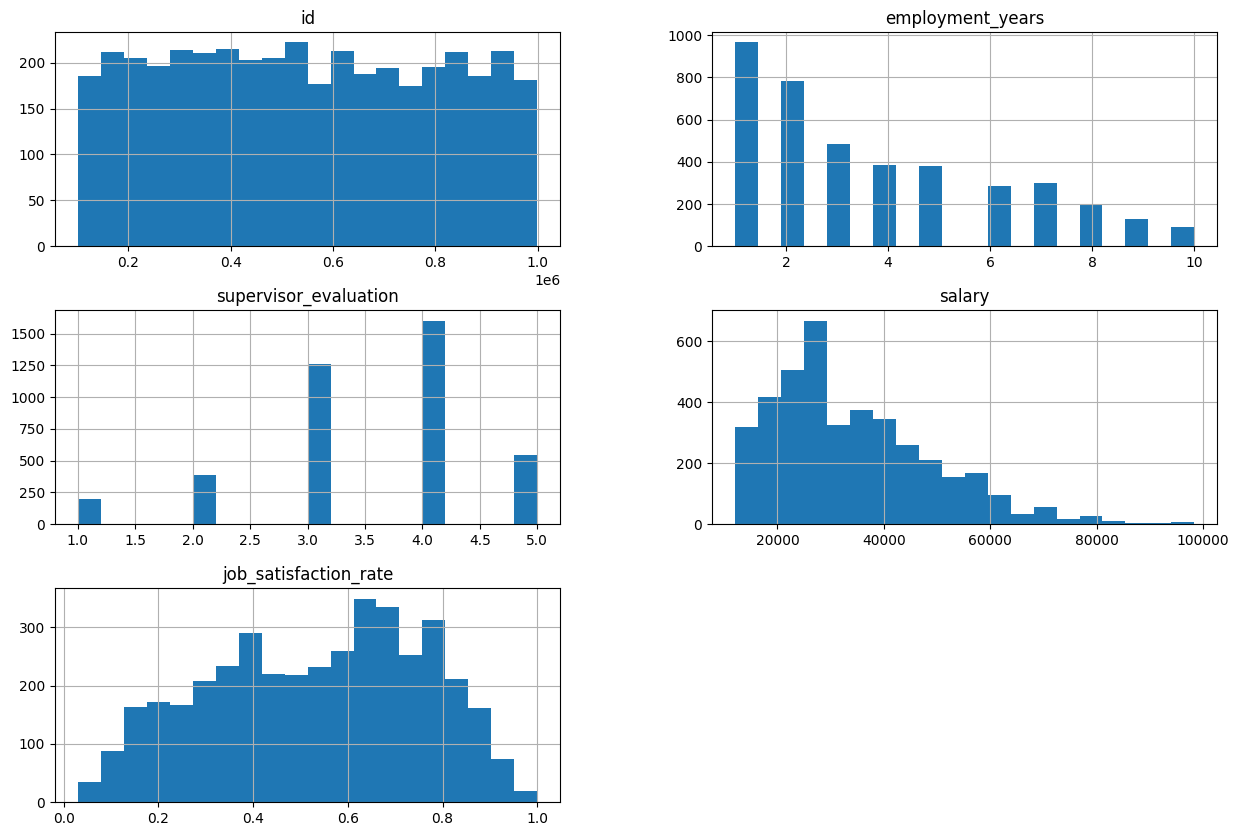

In [6]:
opening(train_job)

ПЕРВЫЕ ПЯТЬ СТРОК


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary     

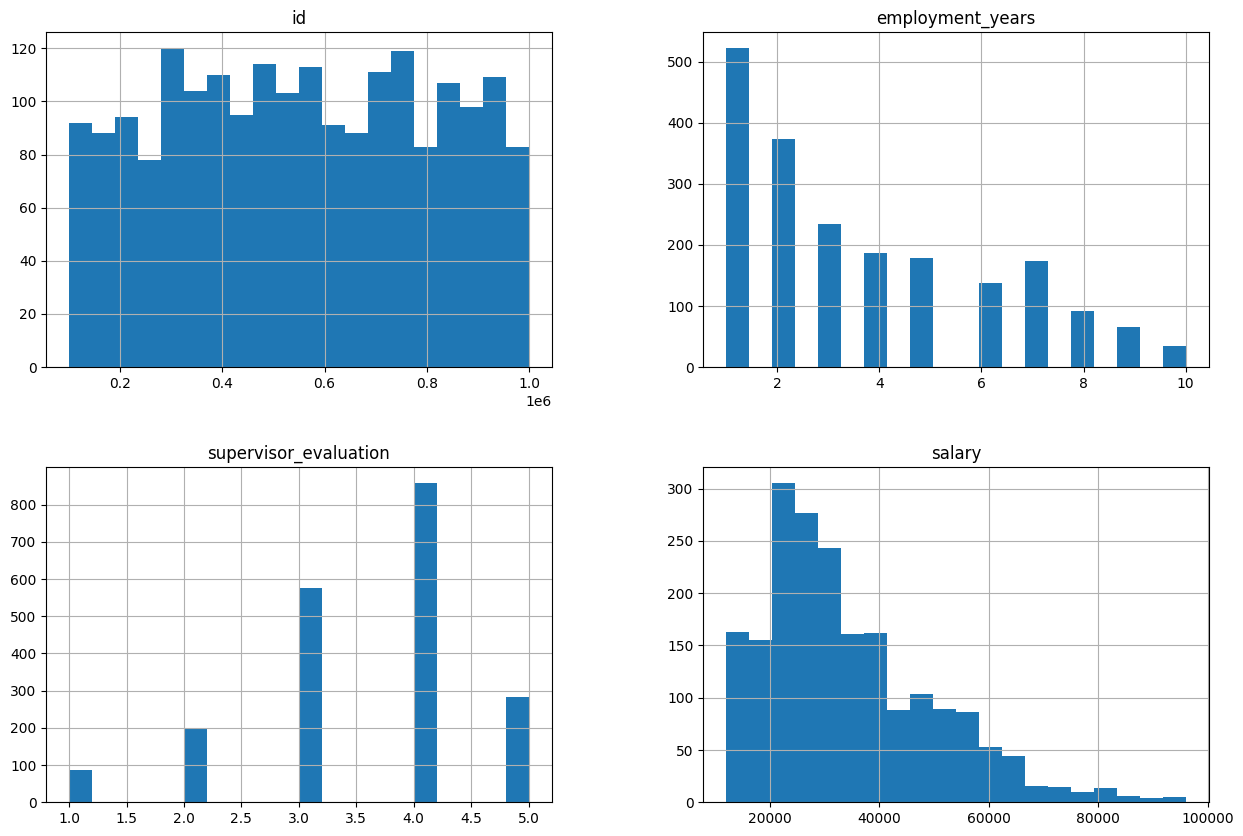

In [7]:
opening(test_features)

ПЕРВЫЕ ПЯТЬ СТРОК


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id                       0
job_satisfaction_rate    0
dtype: int64 

КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ, %
id                       0.0
job_satisfaction_rate    0.0
dtype: float64 

ОПИСАНИЕ ЧИСЛОВЫХ ДАННЫХ
                  id  job_satisfaction_rate
count    2000.000000             2000.00000
mean   552765.213500                0.54878
std    253851.326129                0.22011
min    100298.000000                0.03000
25%    339052.000000                0.38000
50%    550793.000000                0.58000
75%    765763.750000                0.72000
max    999029.000000     

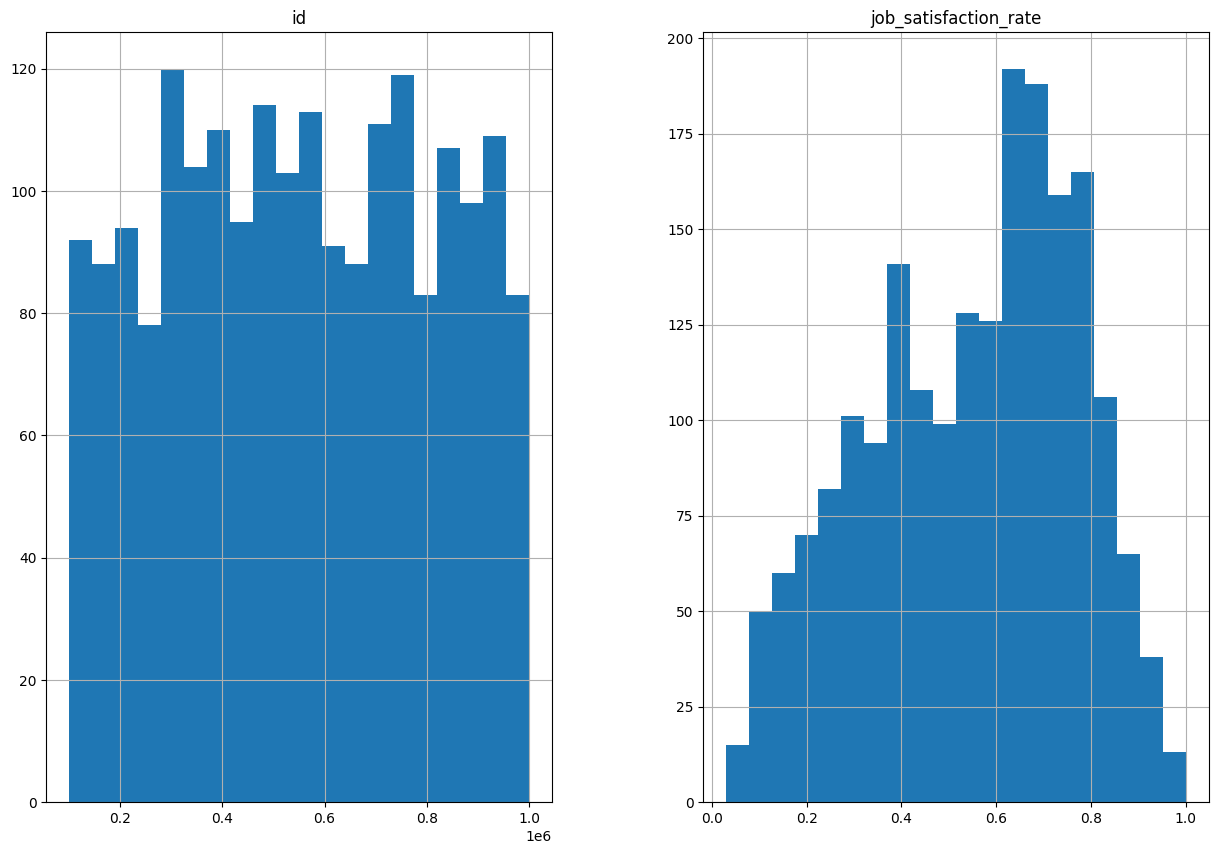

In [8]:
opening(test_target)

**Вывод по разделу 1**:
    
У нас есть 3 датасета с данными по анкетированию сотрудников, которые раньше были одним общим файлом с данными. Файл этот поделили на 3 части
1) Тренировочная выборка. С входными и целевыми признаками. 4000 строк, 10 колонок  
2) Тестовая выборка. Только входные признаки. 2000 строк и 9 колонок  
3) Тестовая выборка целевых признаков. 2000 строк и 1 колонка

<a id="предобработка1"></a>  
# 2. Предобработка данных

На первый взгляд у нас нет дубликатов, однако нам тут может мешать колонка 'id'. Сделаем ее индексом и проверим еще раз в тренировочной выборке. В тестовых выборках мы просто сделаем 'id' индексом, но не будем там ничего удалять

In [9]:
train_job = train_job.set_index('id')
test_features = test_features.set_index('id')
test_target = test_target.set_index('id')

В тестовых данных есть несколько строк, в которых есть пробелы. Заменим их на NaN. Так же заменим sinior на senior

In [10]:
test_features = test_features.replace(['', ' '], np.nan)
train_job['level'] = train_job['level'].replace('sinior', 'senior')
test_features['level'] = test_features['level'].replace('sinior', 'senior')

**ИТОГО ПО РАЗДЕЛУ:**
1) Сделали id индексом  
2) Избавились от дубликатов в тренировочной выборке, они мешают обучению  
3) Заменили в тестовой выборке целевых признаков пустые поля в строках на пропуски

<a id="исслед1" ></a>
# 3. Исследовательский анализ данных

In [11]:
train_job.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [12]:
train_job.describe(include='object')

,dept,level,workload,last_year_promo,last_year_violations
count,3994,3996,4000,4000,4000
unique,5,3,3,2,2
top,sales,junior,medium,no,no
freq,1512,1894,2066,3880,3441


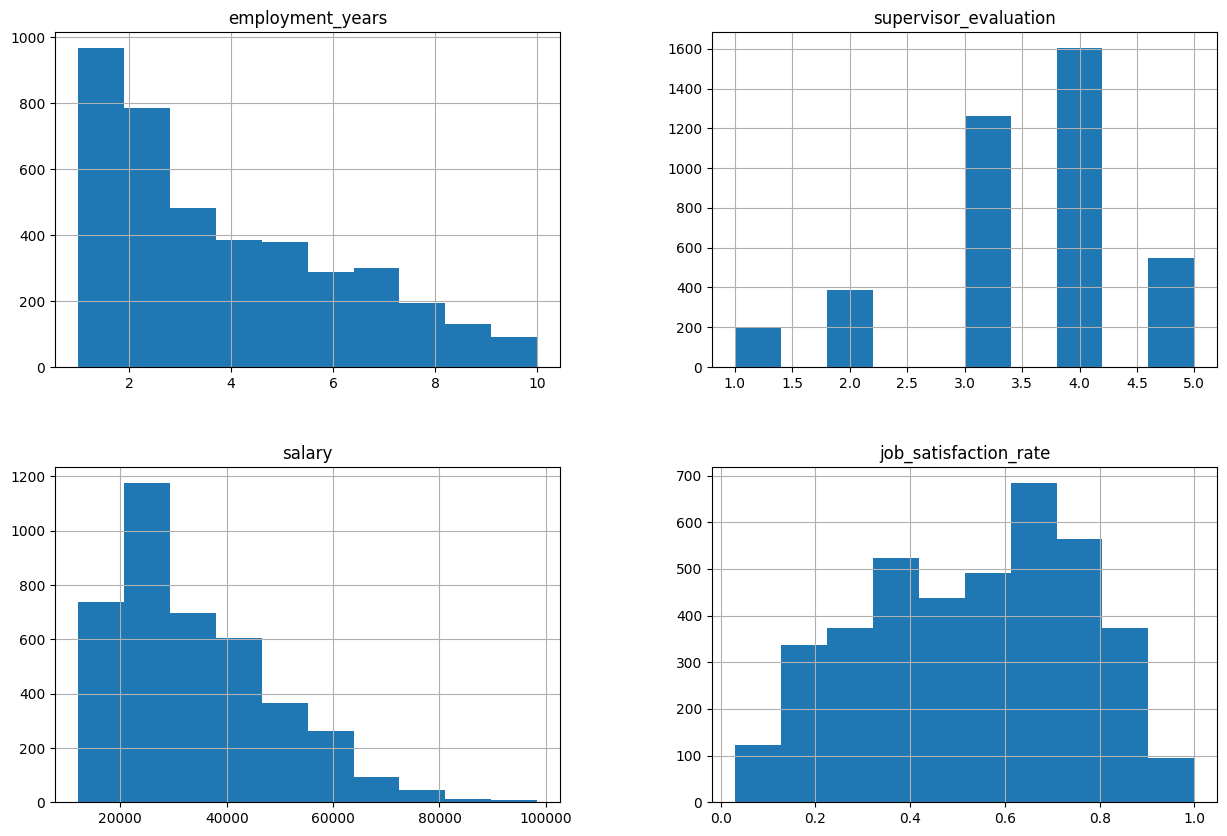

In [13]:
train_job.hist(figsize=(15,10));

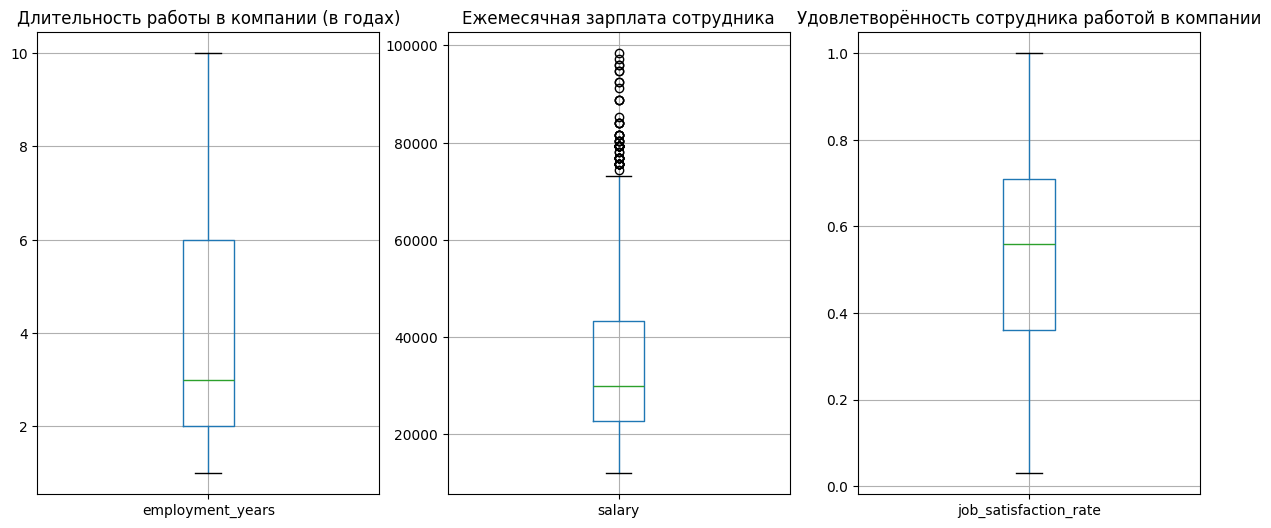

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

train_job.boxplot(column = 'employment_years', ax=axes[0])
axes[0].set_title('Длительность работы в компании (в годах)')

train_job.boxplot(column = 'salary', ax=axes[1])
axes[1].set_title('Ежемесячная зарплата сотрудника')

train_job.boxplot(column = 'job_satisfaction_rate', ax=axes[2])
axes[2].set_title('Удовлетворённость сотрудника работой в компании');

На гистограммах и боксплотах видно, что 50% сотрудников работают в компании от 2 до 6 лет. Максимально 10 лет. Зарплата сотрудников в среднем около 30 тысяч рублей, но есть и несколько высокооплачиваемых сотрудников. Оценки и уровень удовлетворенности размазаны по всей длине графика, но в основном они чуть выше средней оценки в шкале

In [15]:
def sc_plot(a,b):
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data=train_job, x='job_satisfaction_rate', y=a, hue=b)
    plt.xlabel('Удовлетворённость сотрудника работой в компании')
    plt.ylabel('Зарплата')
    return sc_plot

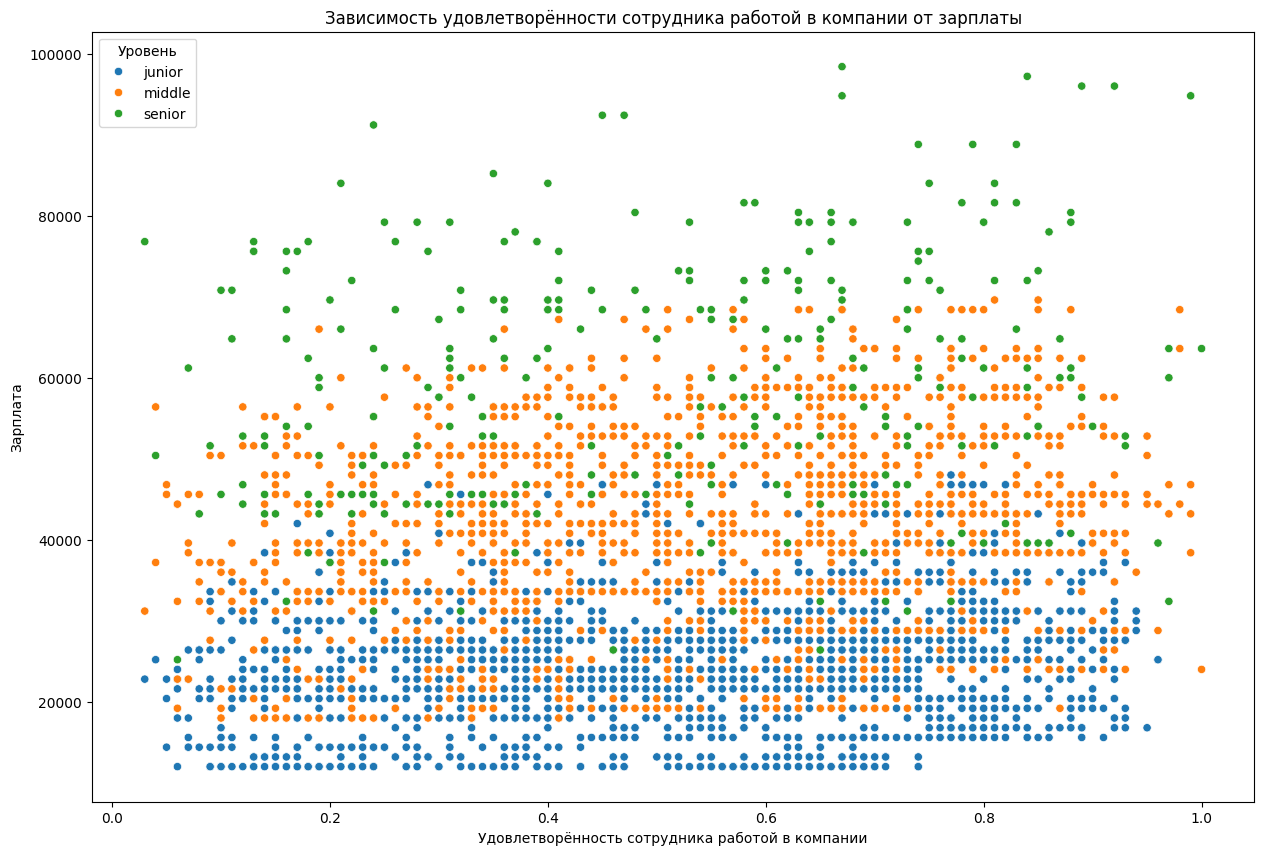

In [16]:
sc_plot('salary', 'level')
plt.title('Зависимость удовлетворённости сотрудника работой в компании от зарплаты')
plt.legend(title='Уровень');

По данному графике все уровни сотрудников как удовлетворены работой, так и наоборот. Ничего конкретного сказать нельзя

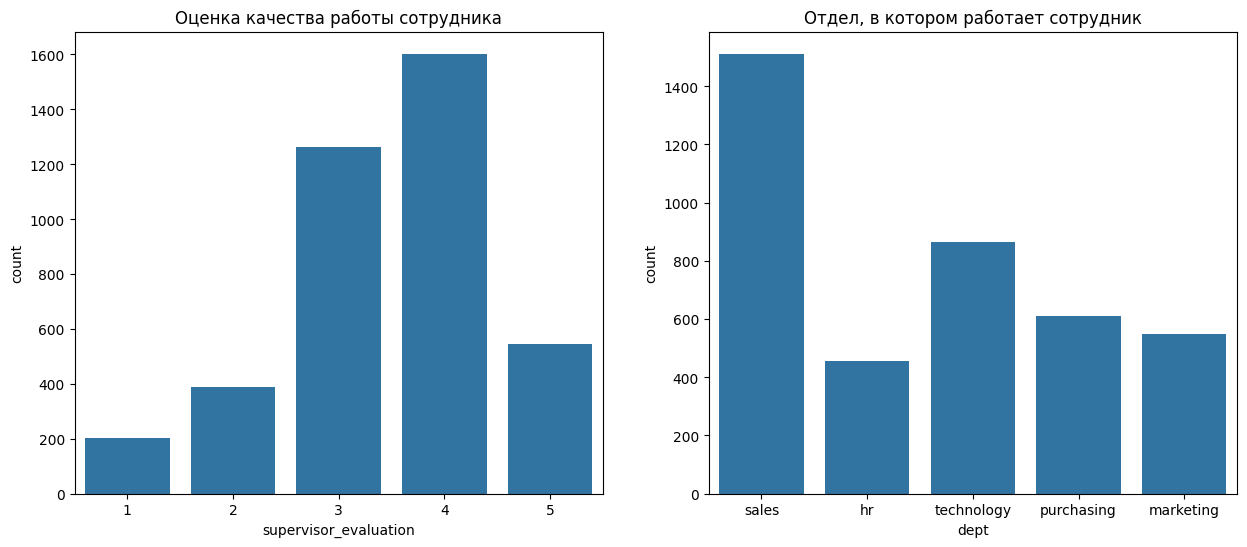

In [17]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=train_job, x='supervisor_evaluation', ax=axes[0])
axes[0].set_title('Оценка качества работы сотрудника')

sns.countplot(data=train_job, x='dept', ax=axes[1])
axes[1].set_title('Отдел, в котором работает сотрудник');

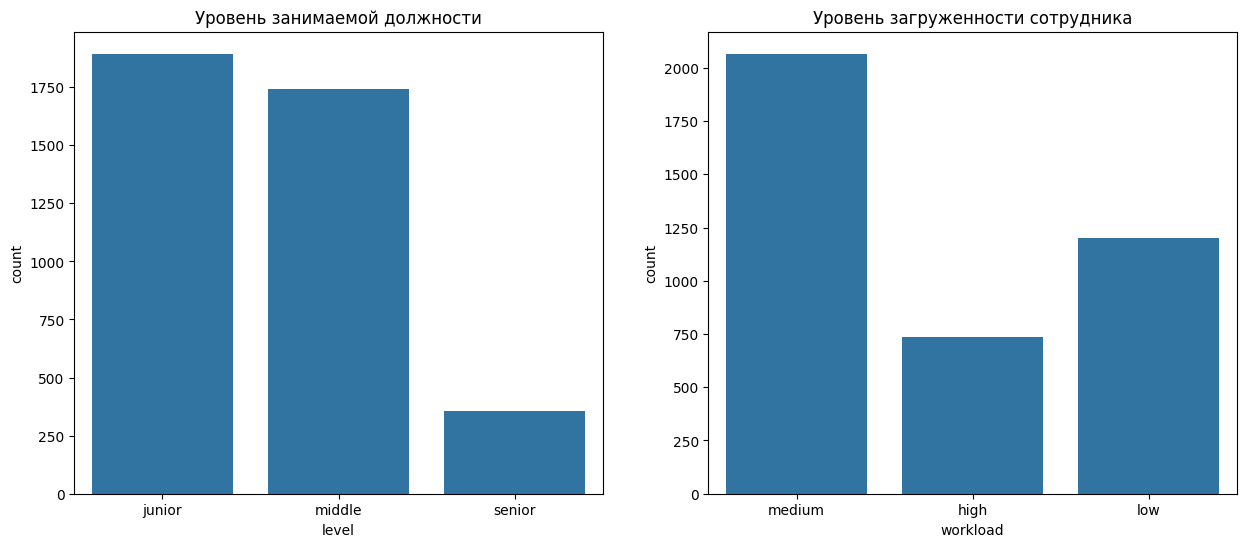

In [18]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=train_job, x='level', ax=axes[0])
axes[0].set_title('Уровень занимаемой должности')

sns.countplot(data=train_job, x='workload', ax=axes[1])
axes[1].set_title('Уровень загруженности сотрудника');

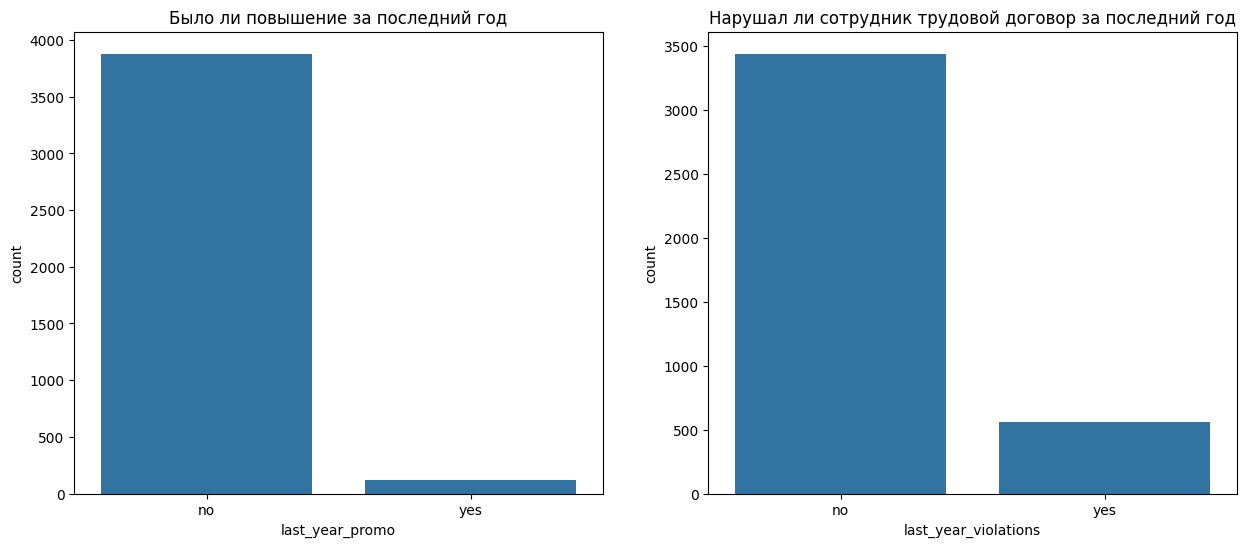

In [19]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=train_job, x='last_year_promo', ax=axes[0])
axes[0].set_title('Было ли повышение за последний год')

sns.countplot(data=train_job, x='last_year_violations', ax=axes[1])
axes[1].set_title('Нарушал ли сотрудник трудовой договор за последний год');

In [20]:
test_features.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [21]:
test_features.describe(include='object')

,dept,level,workload,last_year_promo,last_year_violations
count,1997,1999,1999,2000,2000
unique,5,3,3,2,2
top,sales,junior,medium,no,no
freq,763,974,1043,1937,1738


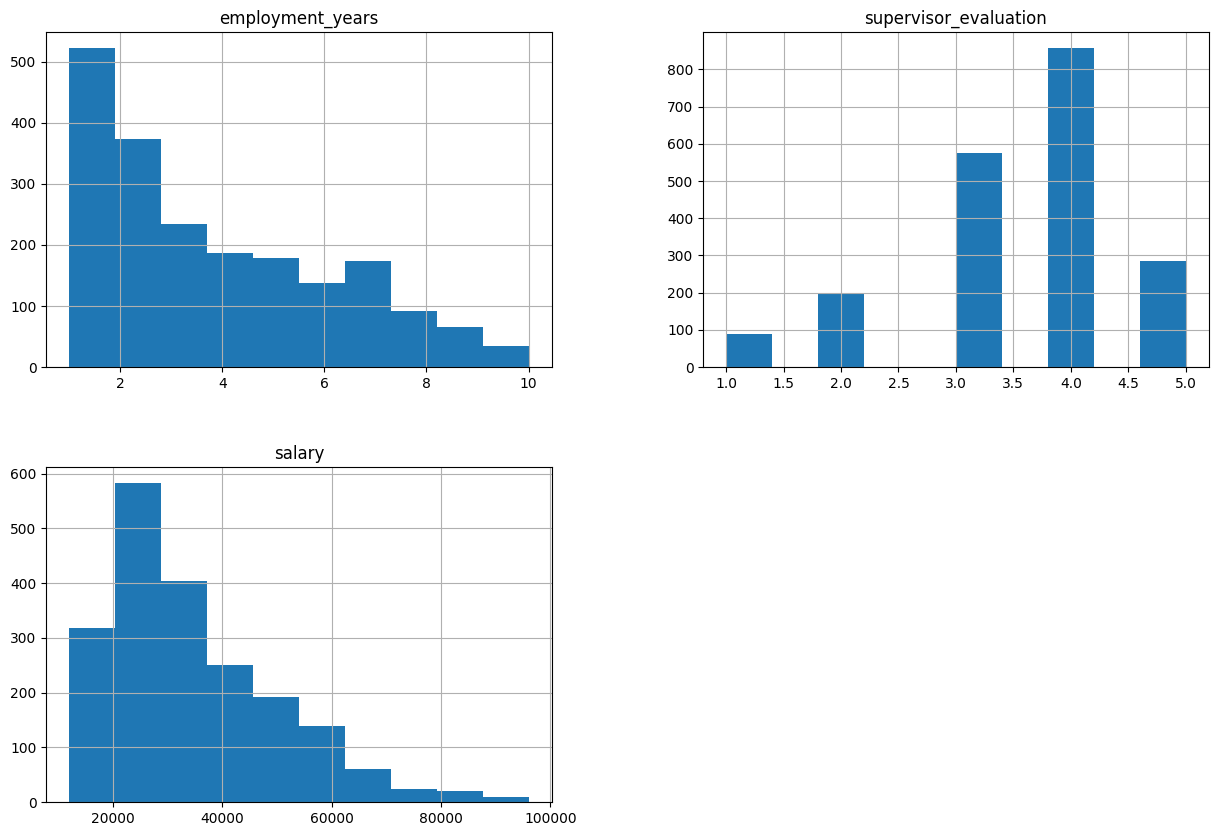

In [22]:
test_features.hist(figsize=(15,10));

Text(0.5, 1.0, 'Ежемесячная зарплата сотрудника')

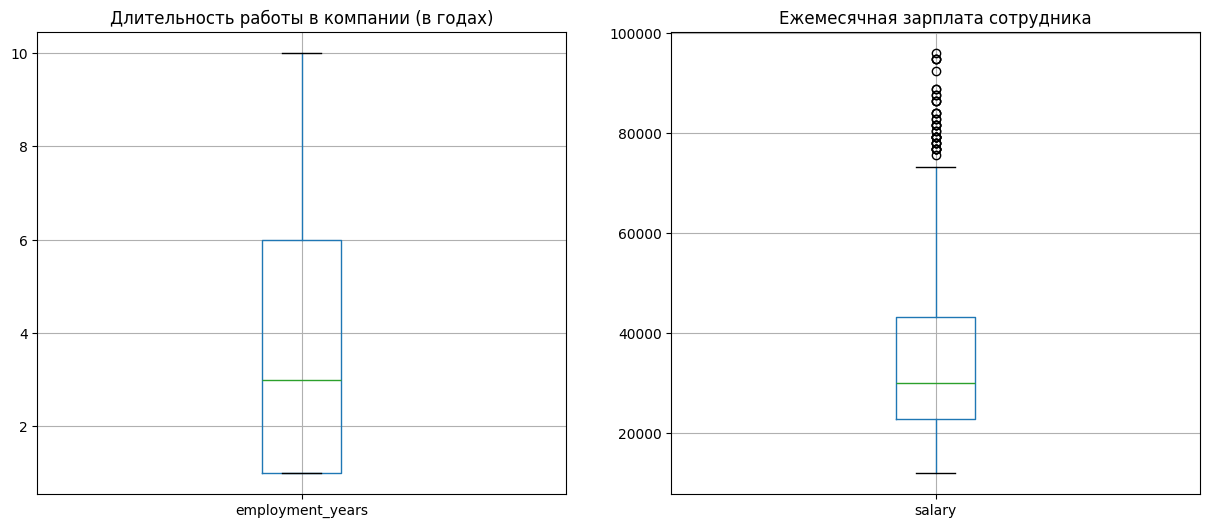

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

test_features.boxplot(column = 'employment_years', ax=axes[0])
axes[0].set_title('Длительность работы в компании (в годах)')

test_features.boxplot(column = 'salary', ax=axes[1])
axes[1].set_title('Ежемесячная зарплата сотрудника')

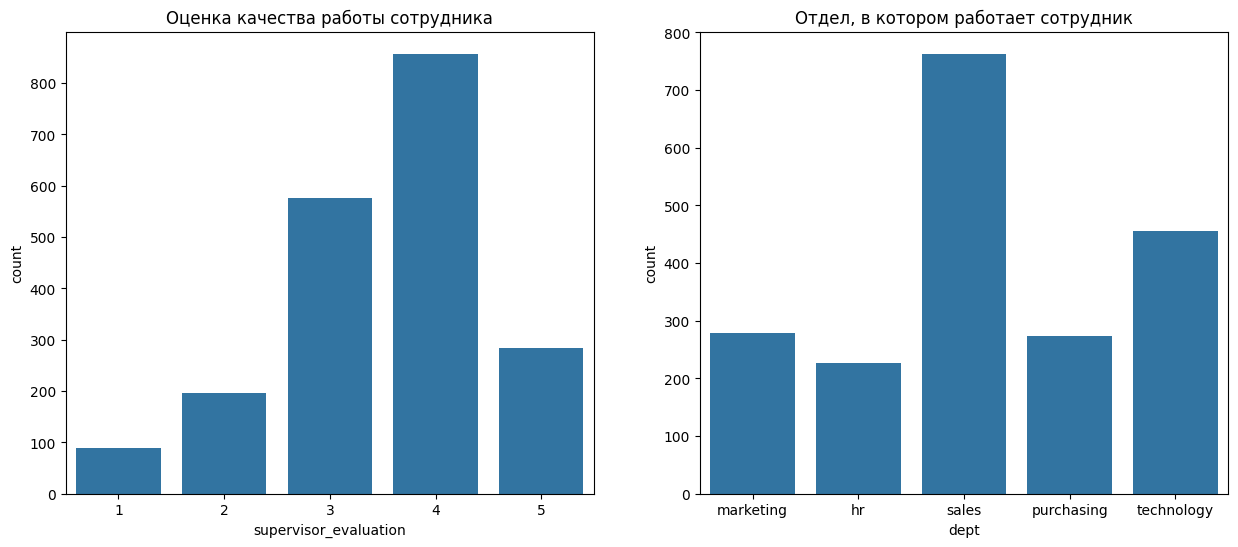

In [24]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=test_features, x='supervisor_evaluation', ax=axes[0])
axes[0].set_title('Оценка качества работы сотрудника')

sns.countplot(data=test_features, x='dept', ax=axes[1])
axes[1].set_title('Отдел, в котором работает сотрудник');

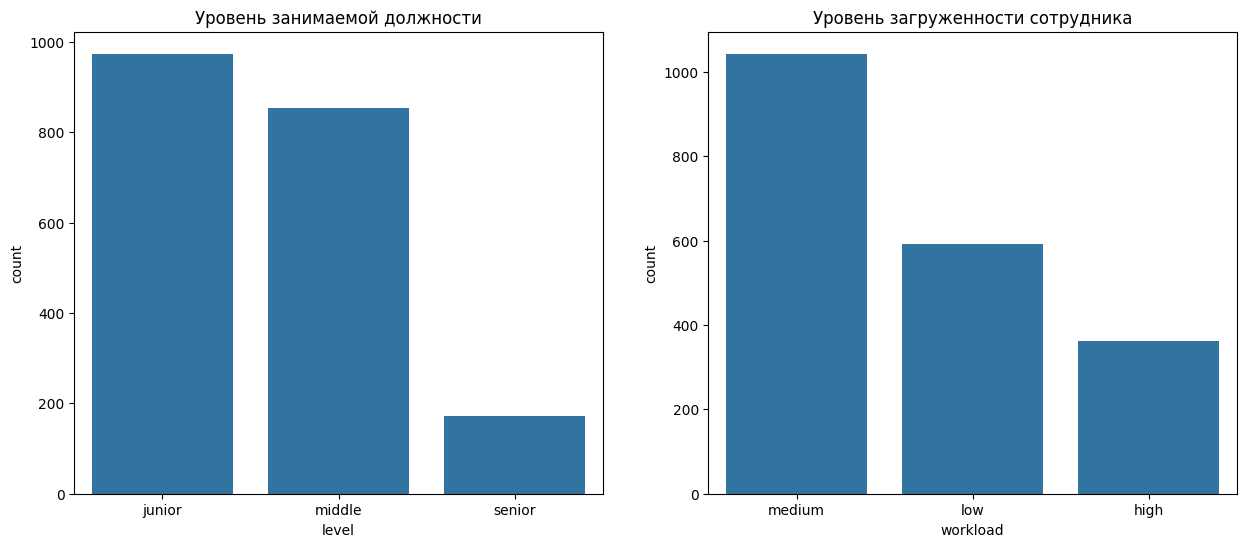

In [25]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=test_features, x='level', ax=axes[0])
axes[0].set_title('Уровень занимаемой должности')

sns.countplot(data=test_features, x='workload', ax=axes[1])
axes[1].set_title('Уровень загруженности сотрудника');

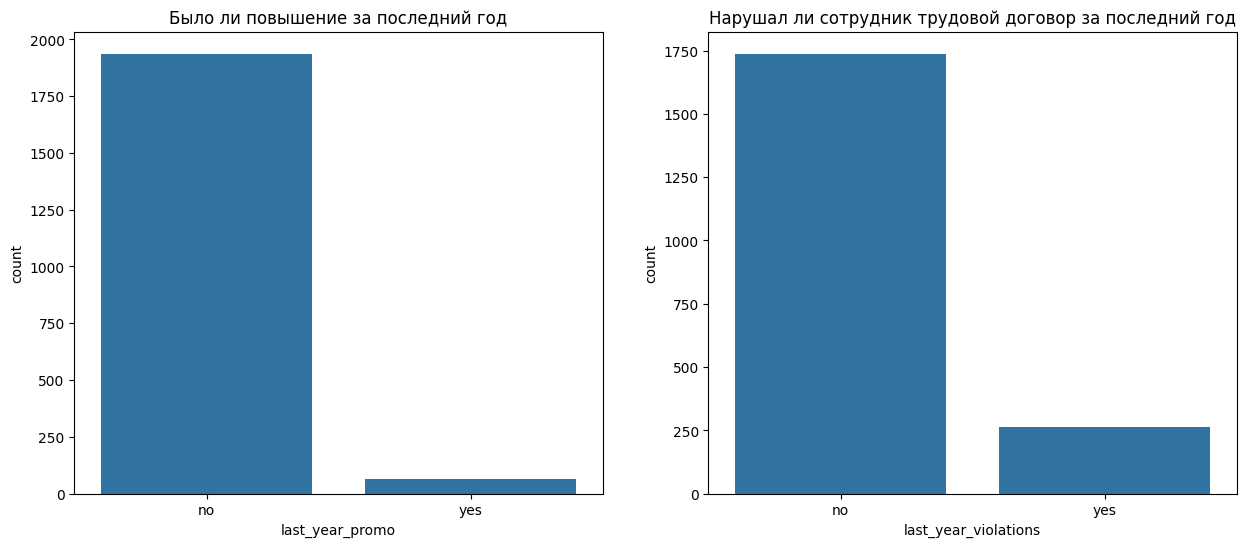

In [26]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=test_features, x='last_year_promo', ax=axes[0])
axes[0].set_title('Было ли повышение за последний год')

sns.countplot(data=test_features, x='last_year_violations', ax=axes[1])
axes[1].set_title('Нарушал ли сотрудник трудовой договор за последний год');

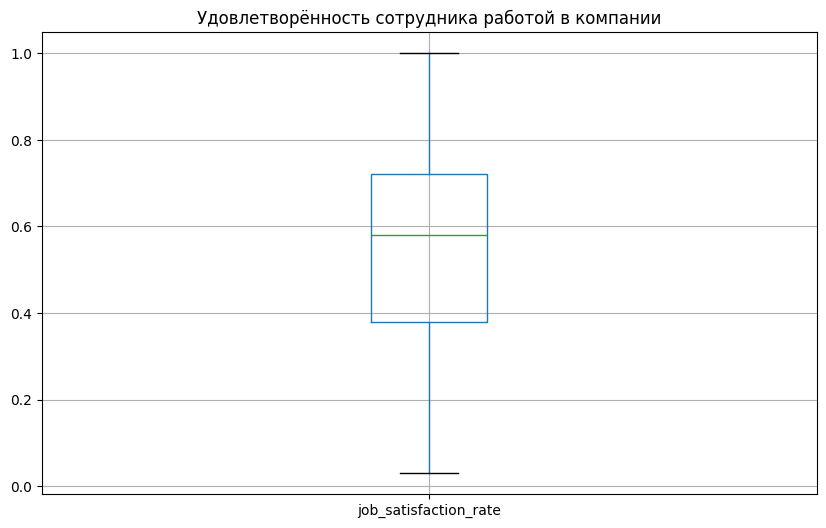

In [27]:
plt.figure(figsize=(10,6))
test_target.boxplot(column = 'job_satisfaction_rate')
plt.title('Удовлетворённость сотрудника работой в компании');

**ИТОГО ПО РАЗДЕЛУ:** 
1) Были исследованы количественные и категориальные признаки двух таблиц  
2) Выбросы с ежемесячной зарплатой сотрудников связаны с тем, что это зарплаты сеньоров  
3) Почти все сотрудники не получали повышение в последний год, и многие не нарушали трудовой договор  
4) В остальном везде нормальное распределение, более-менее разумное количество в каждых оцениваемых группах, без сюрпризов, никаких различий видимых нет между двумя таблицами

<a id="подготовка1"></a>  
# 4. Подготовка данных

Перед настройкой пайплайна сначала проведем корреляционный анализ, посмотрим, вдруг какие признаки обладают мультиколлинеарностью

In [28]:
interval_cols = list(train_job.select_dtypes(include='number').columns)
for col in ['employment_years', 'supervisor_evaluation']:
    interval_cols.remove(col)
interval_cols

['salary', 'job_satisfaction_rate']

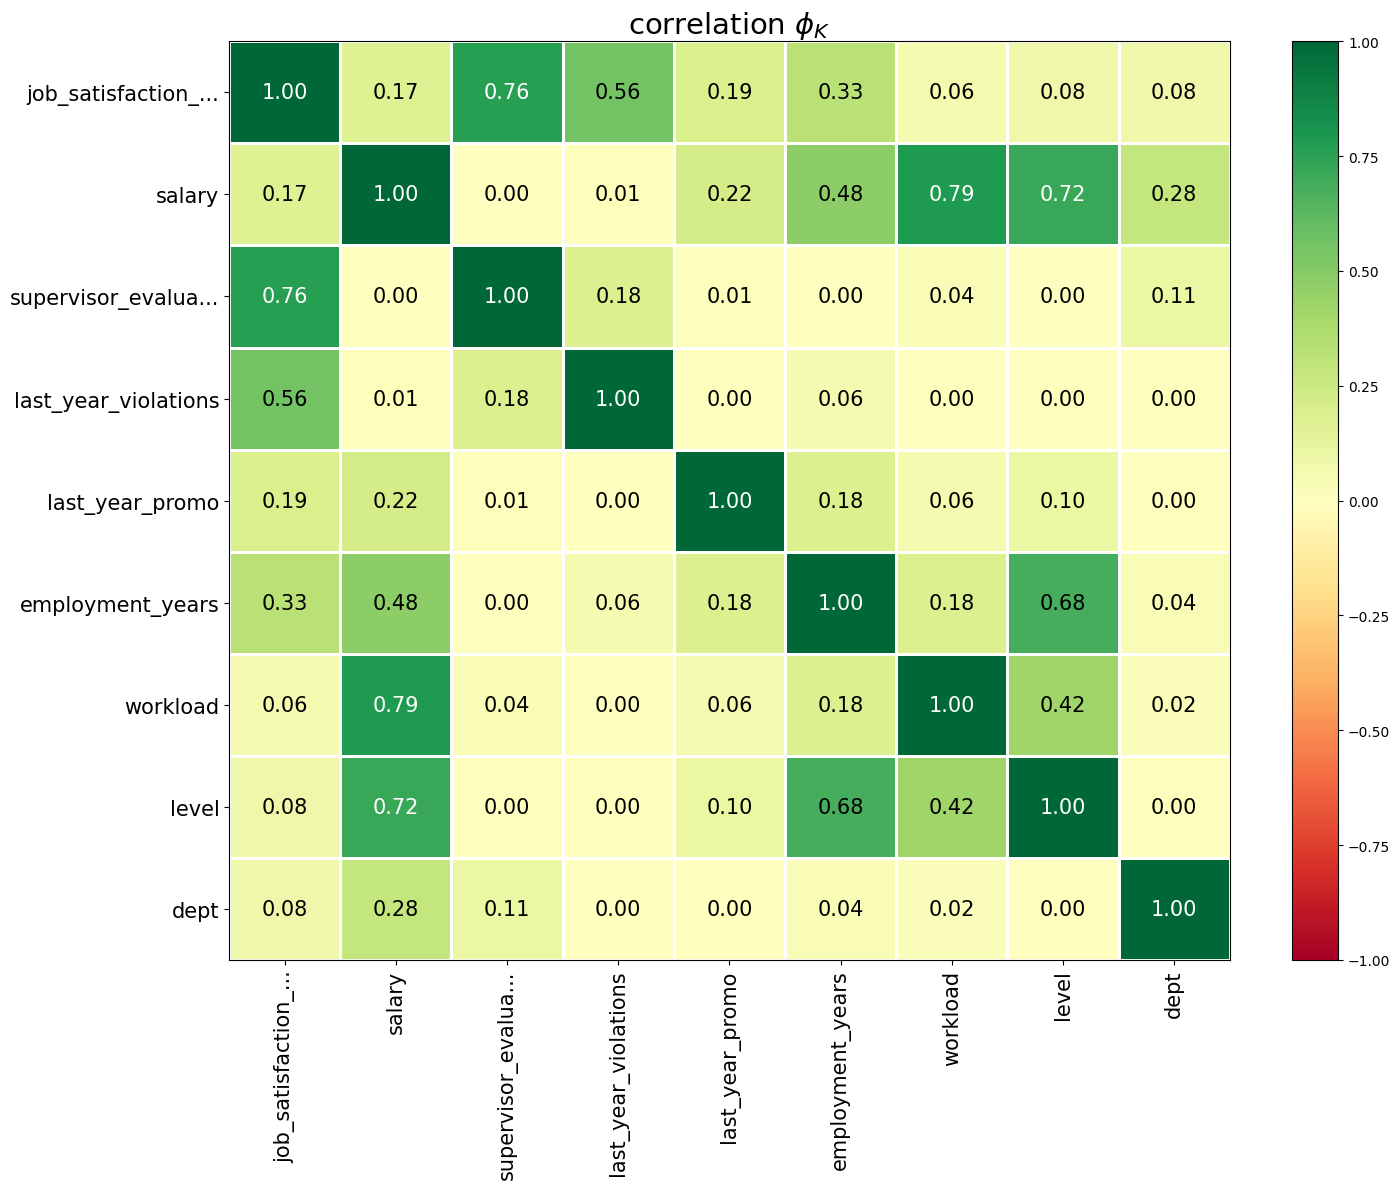

In [29]:
phik_overview = train_job.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(15, 12)
)

Мультиколлениарности нет, всё в порядке, теперь можно вернуться к изначальным датасетам после предобработки:
1) Тренировочный без дубликатов  
2) Оба тестовых, где заменили пустые значения на пропуски

Начинаем подготовку к моделированию. Удалим дубликаты из train_job

In [30]:
train_job.duplicated().sum()

245

In [31]:
train_job = train_job.drop_duplicates()
train_job.shape

(3755, 9)

In [32]:
display(train_job.head(3))
display(test_features.head(3))
display(test_target.head(3))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200


,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60


Объединим тестовые датасеты в один

In [33]:
test_job = test_features.merge(test_target, on = 'id')
test_job.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64


Начнем подготовку пайплайнов

In [34]:
X_train = train_job.drop(columns = 'job_satisfaction_rate')
y_train = train_job['job_satisfaction_rate']

X_test = test_job.drop(columns = 'job_satisfaction_rate')
y_test = test_job['job_satisfaction_rate']

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [35]:
ohe_pipe = Pipeline([
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])

ord_pipe = Pipeline([
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[
                                            ['junior', 'middle', 'senior'],
                                            ['low', 'medium', 'high']
                                          ], handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'))    
    ])

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough') 

pipe_final= Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ])

param_grid = [
     {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

**Итог по разделу:**
1) Проверили данные на мультиколлинеарность - всё в порядке, её нет  
2) Были объединены два датасета с тестовыми данными по id, чтобы потом правильно разделить тренировочную и тестовую по входным и целевым признакам  
2) Создали пайплайн с 2 моделями, разделили признаки по категориям, преобразовали их

<a id='модели1'></a>
# 5. Обучение моделей

In [36]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0
    return np.mean(diff) * 100

smape_scorer = make_scorer(smape, greater_is_better=False) # для make_scorer обязательно greater_is_better=False

In [37]:
gs = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer
)

gs.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'models': [DecisionTreeR...ndom_state=42)], 'models__max_depth': range(1, 15), 'preprocessor__num': [StandardScaler(), MinMaxScaler(), ...]}, {'models': [LinearRegression()], 'preprocessor__num': [StandardScaler(), MinMaxScaler(), ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",make_scorer(s...hod='predict')
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold t

In [38]:
gs_results = (
            pd.DataFrame(gs.cv_results_)[['rank_test_score', 'mean_test_score','params']]
            .sort_values(by='rank_test_score').head(10)
)
gs_results

,rank_test_score,mean_test_score,params
37,1,-15.746591,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'preprocessor__num':..."
38,2,-15.788059,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'preprocessor__num':..."
34,3,-15.792894,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 12, 'preprocessor__num':..."
36,4,-15.797271,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'preprocessor__num':..."
35,5,-15.812048,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 12, 'preprocessor__num':..."
33,6,-15.812778,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 12, 'preprocessor__num':..."
40,7,-15.861139,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 14, 'preprocessor__num':..."
41,8,-15.877627,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 14, 'preprocessor__num':..."
39,9,-15.921180,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 14, 'preprocessor__num':..."
31,10,-15.959593,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 11, 'preprocessor__num':..."


In [39]:
print('Лучшая модель и её параметры:\n\n', gs.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', -gs.best_score_) # умножать на -1

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [40]:
y_test_pred = gs.predict(X_test)
smape_test = smape(y_test, y_test_pred)
print(f"SMAPE на кросс-валидации: {-gs.best_score_:.2f}")
print(f'SMAPE на тестовой выборке: {smape_test:.2f}')

SMAPE на кросс-валидации: 15.75
SMAPE на тестовой выборке: 14.40


**Итого по разделу:**
1) Запустили обучение моделей для поиска лучшей из них  
2) Используя метрику SMAPE (значение на тестовой выборке должно быть меньше 15) нашли лучшую модель - DecisionTreeRegressor(max_depth=14)

<a id='выводы1'></a>
# 6. Оформление выводов

Нам были даны три датасета. Датасет с тренировочными данными (входные + целевые признаки). И 2 датасета с тестовыми данными - в одном целевые, в другом входные признаки. После преобразований, проведения исследовательского анализа, проверки на корреляцию был произведен поиск лучшей модели на обучающих данных. Путем сравнения двух моделей (линейная модель и дерево решений) с добавлением некоторых гиперпараметров была найдена лучшая модель путем сравнения метрики SMAPE. Чем она ближе к нулю, тем лучше. Это значит, что отклонение предсказания от реальных данных небольшое. SMAPE на тестовой выборе оказался ниже 15, это хороший результат. А лучшей моделью оказалось DecisionTreeRegressor(max_depth=13)

<a id="задача2"></a>  
# Задача 2: предсказание увольнения сотрудника из компании

<a id="загрузка2"></a>  
# 1. Загрузка данных

In [41]:
try:
    train_quit2 = pd.read_csv('/datasets/train_quit.csv')
except:
    train_quit2 = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
train_quit2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [42]:
try:
    test_features2 = pd.read_csv('/datasets/test_features.csv')
except:
    test_features2 = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
test_features2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [43]:
try:
    test_target_quit2 = pd.read_csv('/datasets/test_target_quit.csv')
except:
    test_target_quit2 = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')
test_target_quit2

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


ПЕРВЫЕ ПЯТЬ СТРОК


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_vio

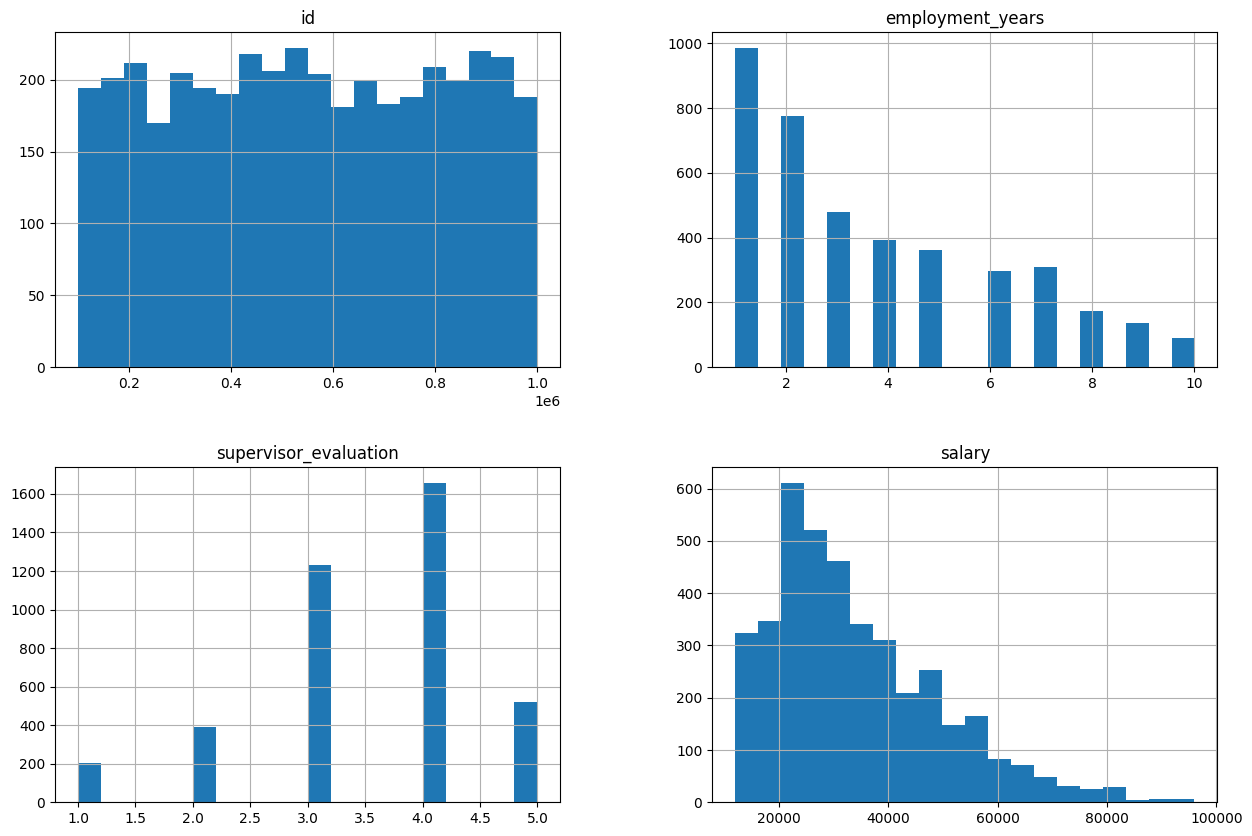

In [44]:
opening(train_quit2)

ПЕРВЫЕ ПЯТЬ СТРОК


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary     

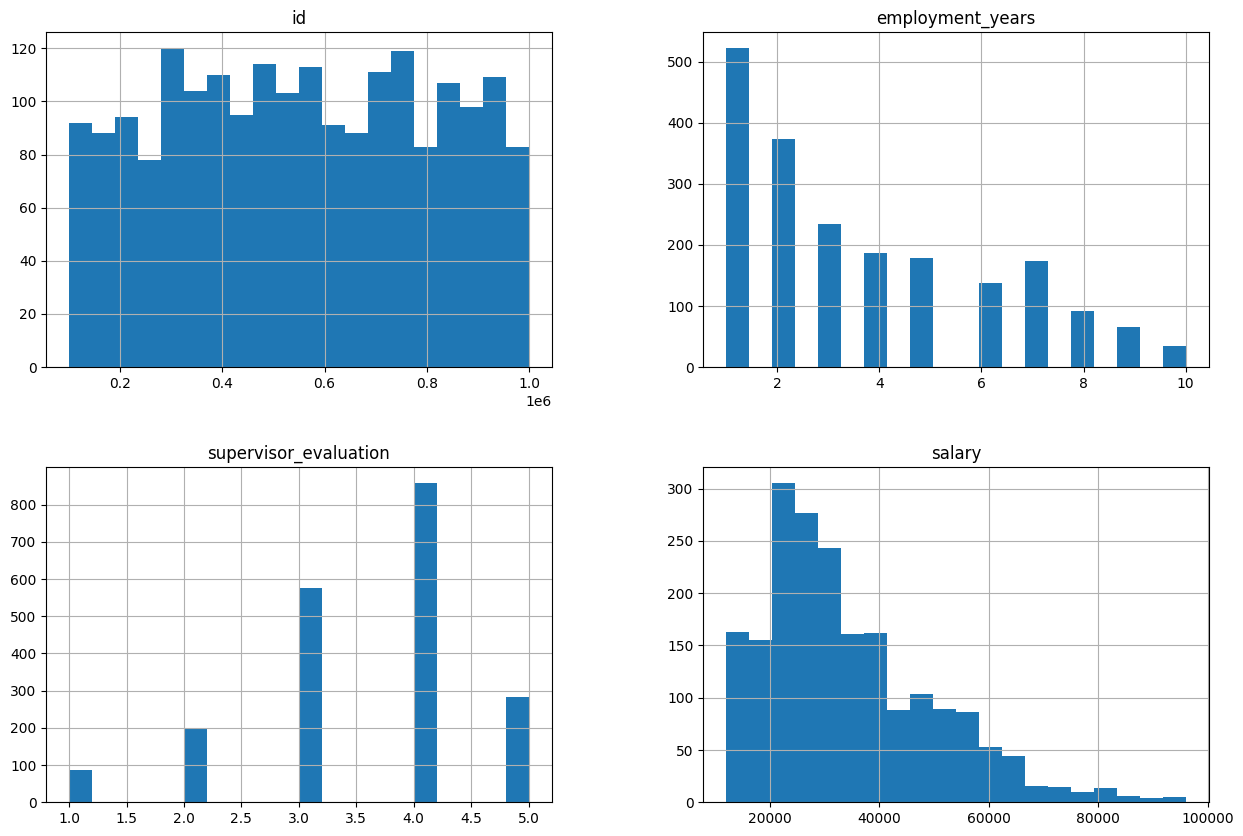

In [45]:
opening(test_features2)

ПЕРВЫЕ ПЯТЬ СТРОК


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id      0
quit    0
dtype: int64 

КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ, %
id      0.0
quit    0.0
dtype: float64 

ОПИСАНИЕ ЧИСЛОВЫХ ДАННЫХ
                  id
count    2000.000000
mean   552765.213500
std    253851.326129
min    100298.000000
25%    339052.000000
50%    550793.000000
75%    765763.750000
max    999029.000000 

УНИКАЛЬНЫЕ ЗНАЧЕНИЯ КАТЕГОРИАЛЬНЫХ ДАННЫХ
quit: 2 уникальные значения - ['yes' 'no']


КОЛИЧЕСТВО ДУБЛИКАТОВ
0
РАСПРЕДЕЛЕНИЕ ДАННЫХ КОЛИЧЕСТВЕННЫХ СТОЛБЦОВ


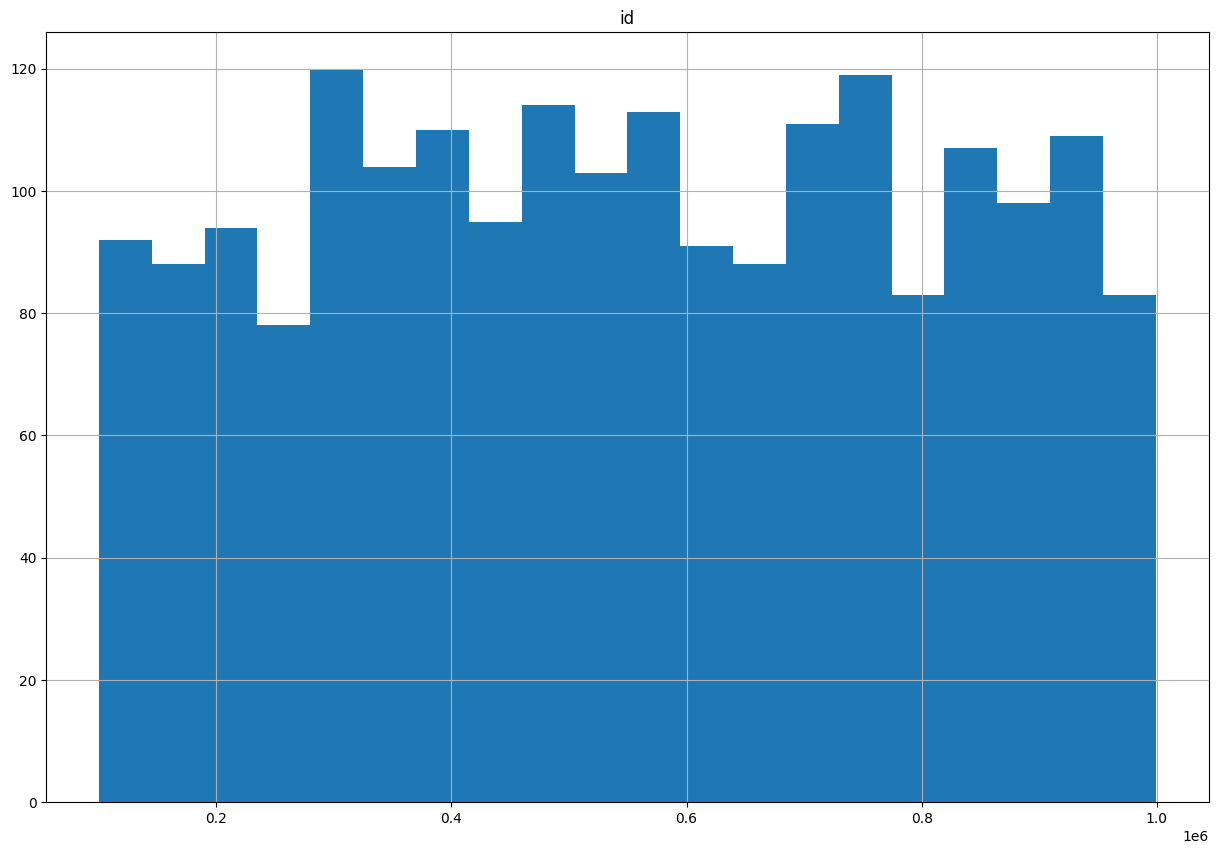

In [46]:
opening(test_target_quit2)

**Вывод по разделу 1**:
    
У нас есть 3 датасета с данными по анкетированию сотрудников, которые раньше были одним общим файлом с данными. Файл этот поделили на 3 части
1) Тренировочная выборка. С входными и целевыми признаками. 4000 строк, 10 колонок  
2) Тестовая выборка. Только входные признаки. 2000 строк и 9 колонок  
3) Тестовая выборка целевых признаков. 2000 строк и 1 колонка

<a id="предобработка2"></a>  
# 2. Предобработка данных

Сделаем id индексами

In [47]:
train_quit2 = train_quit2.set_index('id')
test_features2 = test_features2.set_index('id')
test_target_quit2 = test_target_quit2.set_index('id')

В тестовых данных есть несколько строк, в которых есть пробелы. Заменим их на NaN. Заменим sinior на senior

In [48]:
test_features2 = test_features2.replace(['', ' '], np.nan)
train_quit2['level'] = train_quit2['level'].replace('sinior', 'senior')
test_features2['level'] = test_features2['level'].replace('sinior', 'senior')

**ИТОГО ПО РАЗДЕЛУ:**

1) Сделали id индексом  
2) Избавились от дубликатов в тренировочной выборке, они мешают обучению  
3) Заменили в тестовой выборке целевых признаков пустые поля в строках на пропуски

<a id="исслед2" ></a>
# 3. Исследовательский анализ данных

In [49]:
test_features_3_2 = test_features2.drop_duplicates()

test_job_3_2 = test_features_3_2.merge(test_target_quit2, on = 'id')
df_2 = pd.concat([train_quit2, test_job_3_2])

In [50]:
train_quit2.describe()

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [51]:
train_quit2.describe(include='object')

,dept,level,workload,last_year_promo,last_year_violations,quit
count,4000,4000,4000,4000,4000,4000
unique,5,3,3,2,2,2
top,sales,junior,medium,no,no,no
freq,1438,1949,2118,3887,3455,2872


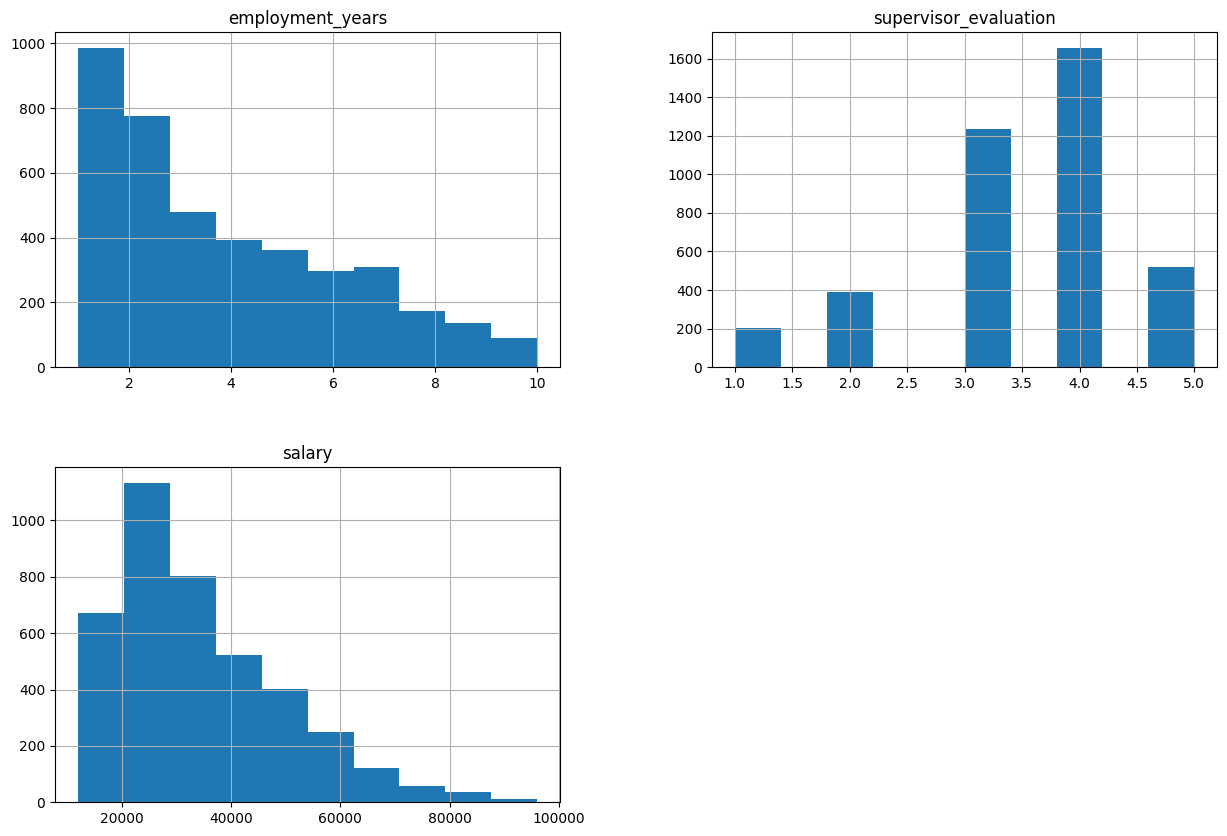

In [52]:
train_quit2.hist(figsize=(15,10));

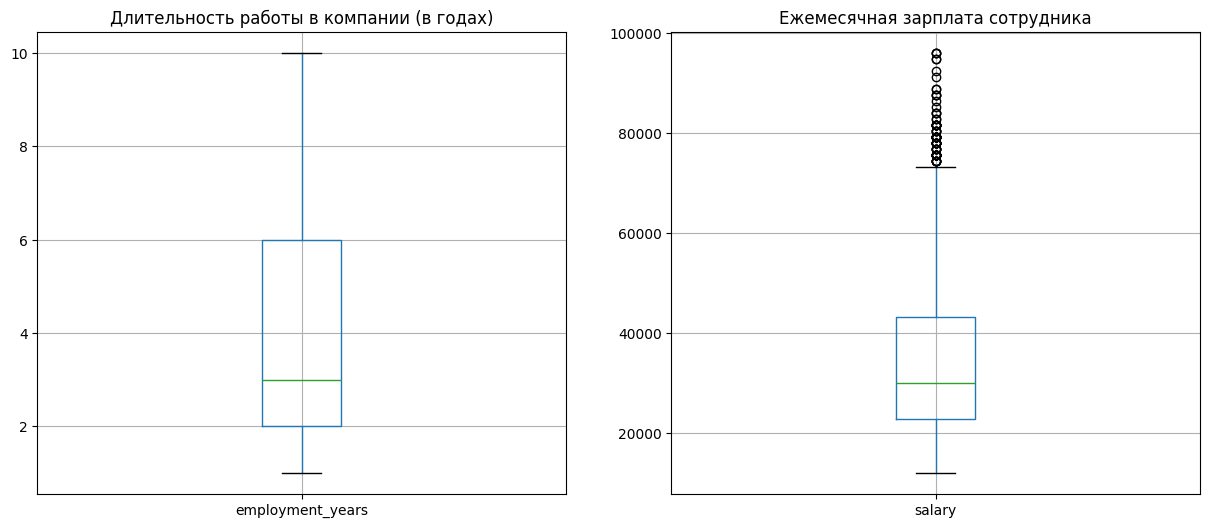

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

train_quit2.boxplot(column = 'employment_years', ax=axes[0])
axes[0].set_title('Длительность работы в компании (в годах)')

train_quit2.boxplot(column = 'salary', ax=axes[1])
axes[1].set_title('Ежемесячная зарплата сотрудника');

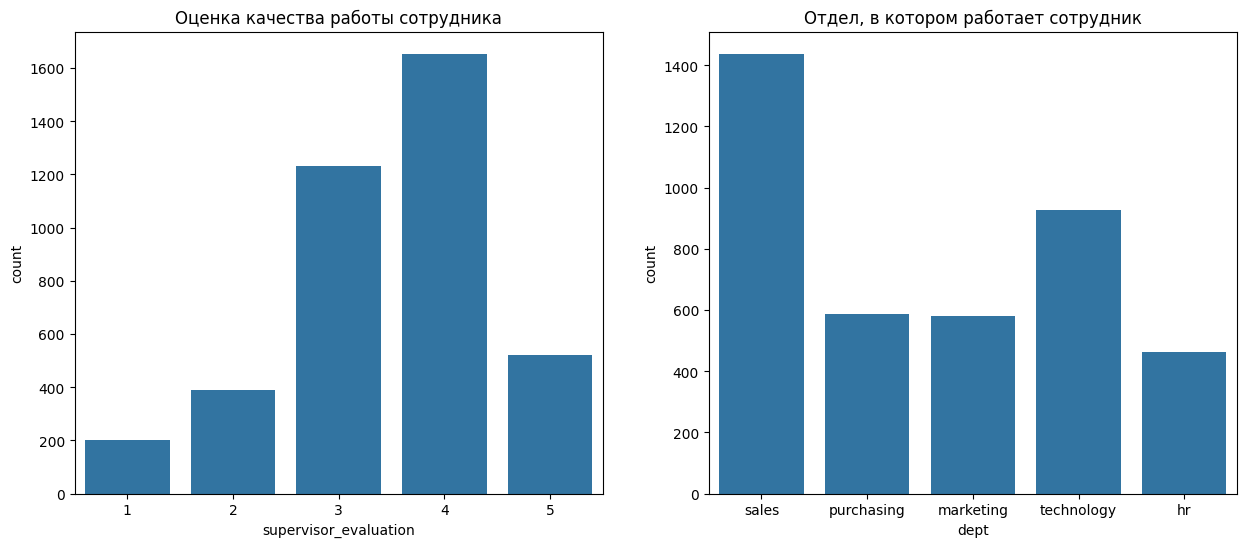

In [54]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=train_quit2, x='supervisor_evaluation', ax=axes[0])
axes[0].set_title('Оценка качества работы сотрудника')

sns.countplot(data=train_quit2, x='dept', ax=axes[1])
axes[1].set_title('Отдел, в котором работает сотрудник');

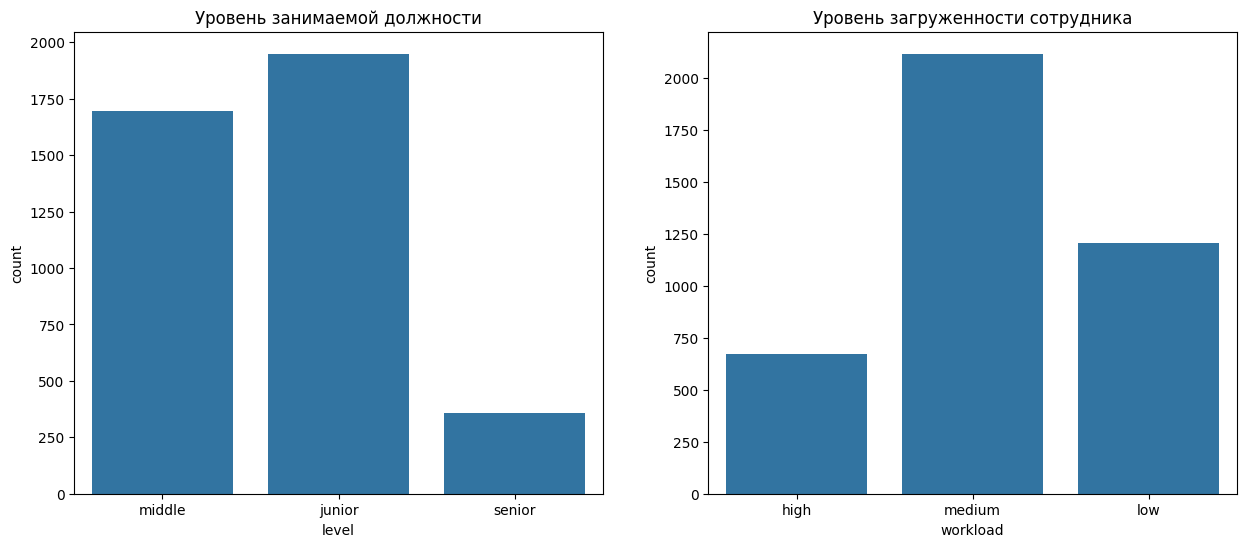

In [55]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=train_quit2, x='level', ax=axes[0])
axes[0].set_title('Уровень занимаемой должности')

sns.countplot(data=train_quit2, x='workload', ax=axes[1])
axes[1].set_title('Уровень загруженности сотрудника');

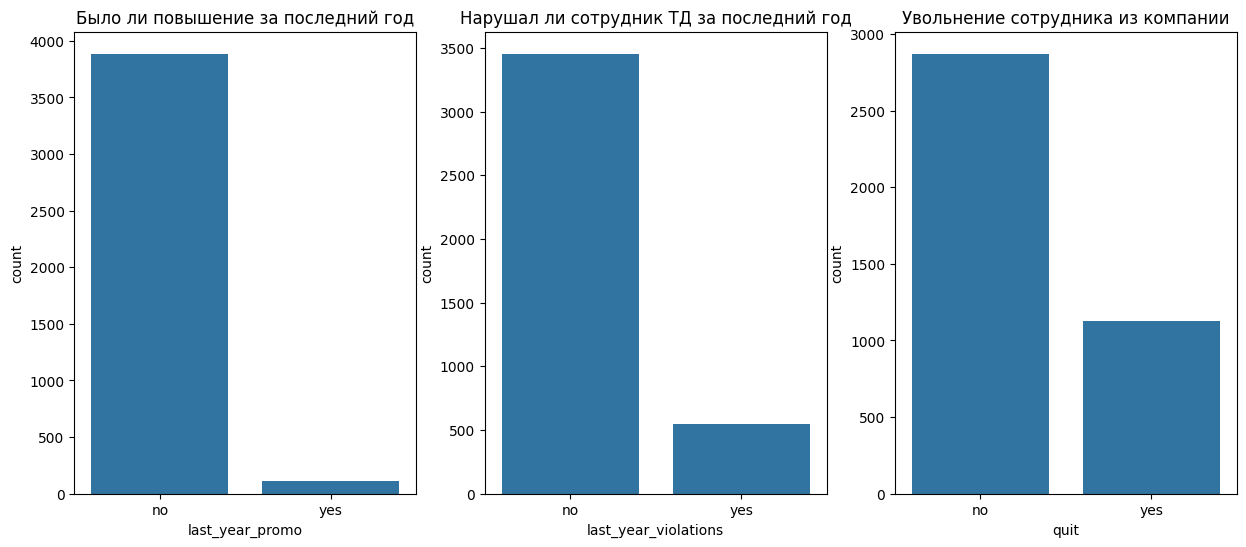

In [56]:
kat, axes = plt.subplots(1, 3, figsize=(15,6))

sns.countplot(data=train_quit2, x='last_year_promo', ax=axes[0])
axes[0].set_title('Было ли повышение за последний год')

sns.countplot(data=train_quit2, x='last_year_violations', ax=axes[1])
axes[1].set_title('Нарушал ли сотрудник ТД за последний год');

sns.countplot(data=train_quit2, x='quit', ax=axes[2])
axes[2].set_title('Увольнение сотрудника из компании');

In [57]:
train_quit2['quit'].value_counts(normalize=True)

quit
no     0.718
yes    0.282
Name: proportion, dtype: float64

Выбросы с ежемесячной зарплатой сотрудников связаны с тем, что это зарплаты сеньоров  Почти все сотрудники не получали повышение в последний год, и многие не нарушали трудовой договор. Целевой признак - увольнение сотрудника. Примерно 28% сотрудников уволились

In [58]:
test_features2.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [59]:
test_features2.describe(include='object')

,dept,level,workload,last_year_promo,last_year_violations
count,1997,1999,1999,2000,2000
unique,5,3,3,2,2
top,sales,junior,medium,no,no
freq,763,974,1043,1937,1738


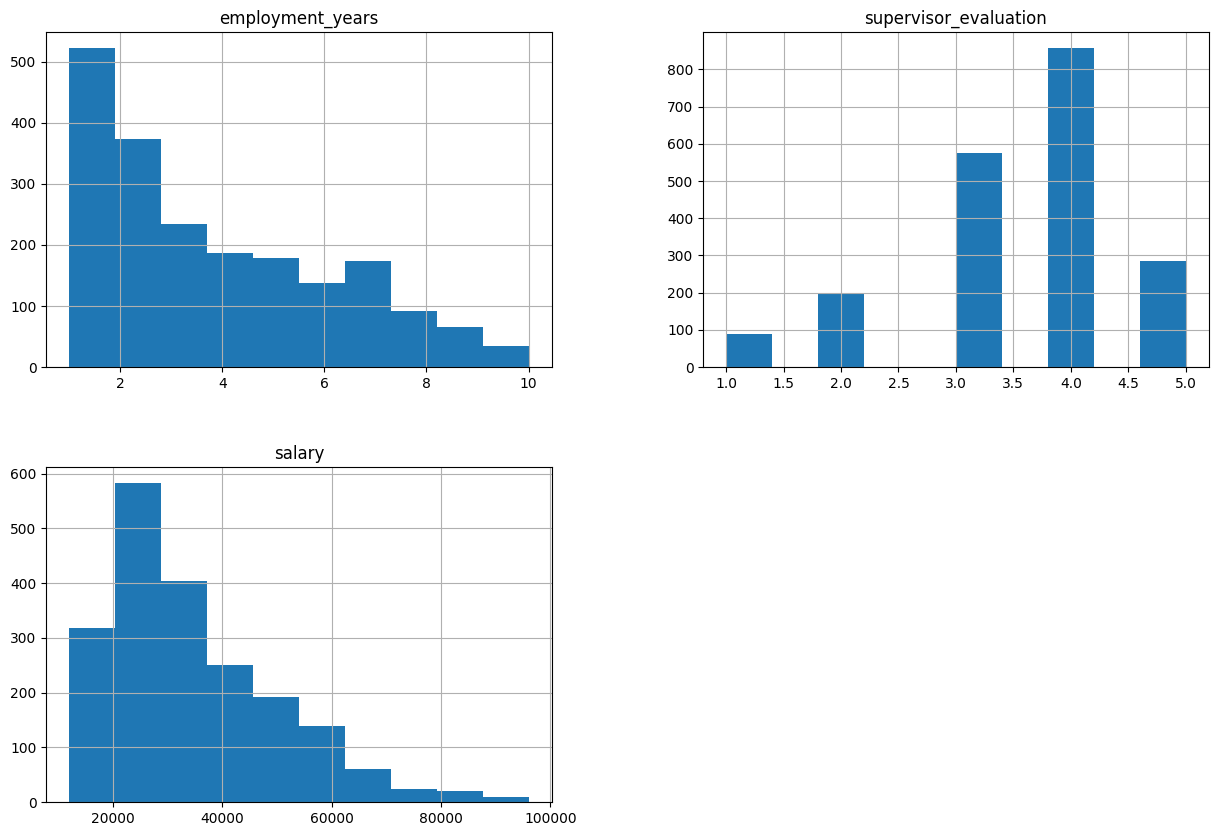

In [60]:
test_features2.hist(figsize=(15,10));

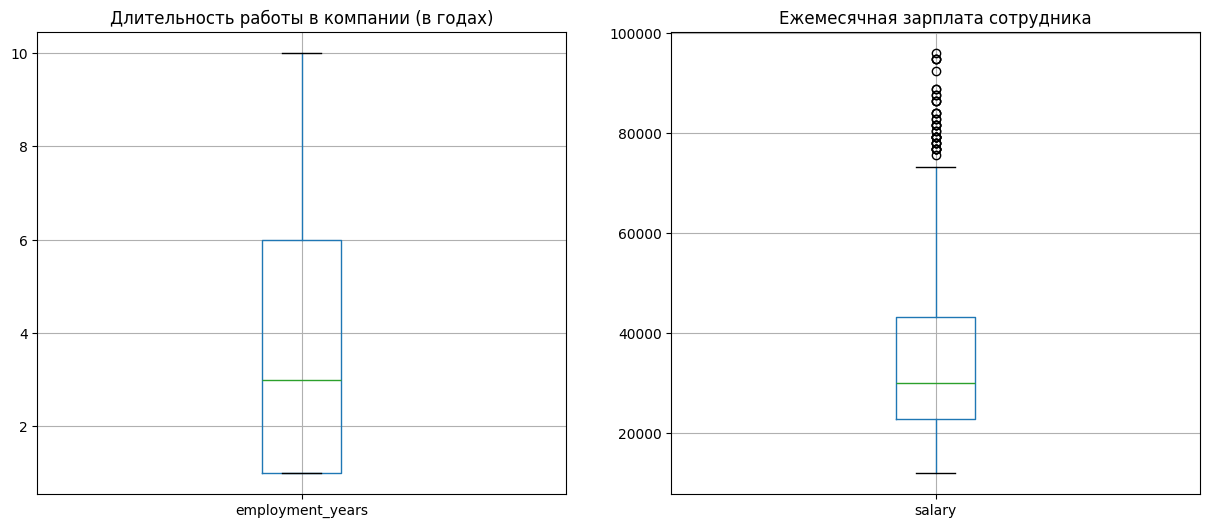

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

test_features2.boxplot(column = 'employment_years', ax=axes[0])
axes[0].set_title('Длительность работы в компании (в годах)')

test_features2.boxplot(column = 'salary', ax=axes[1])
axes[1].set_title('Ежемесячная зарплата сотрудника');

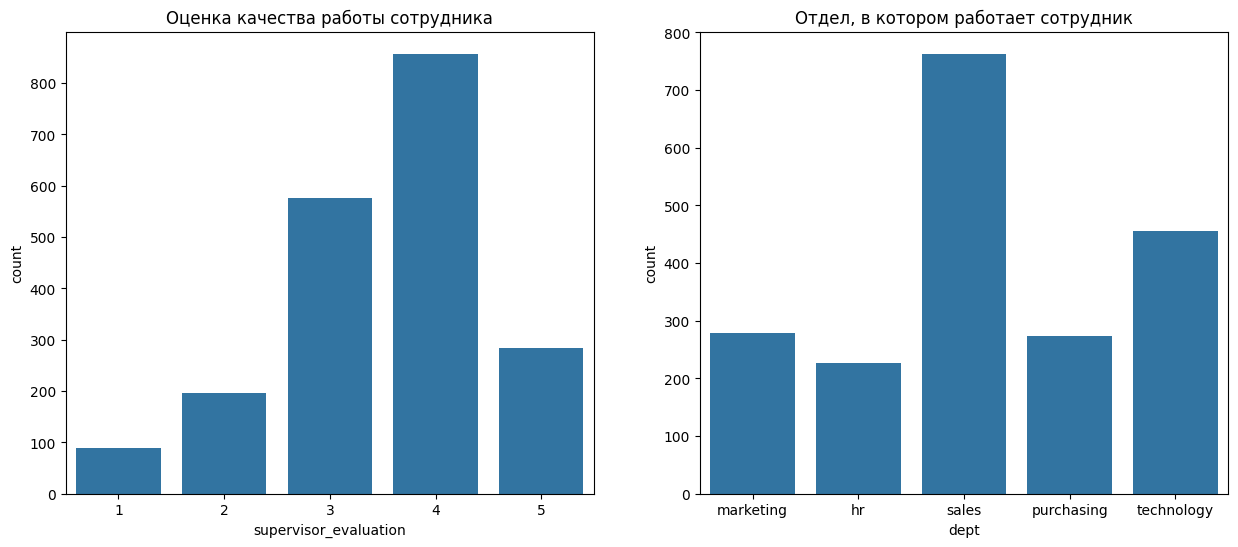

In [62]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=test_features2, x='supervisor_evaluation', ax=axes[0])
axes[0].set_title('Оценка качества работы сотрудника')

sns.countplot(data=test_features2, x='dept', ax=axes[1])
axes[1].set_title('Отдел, в котором работает сотрудник');

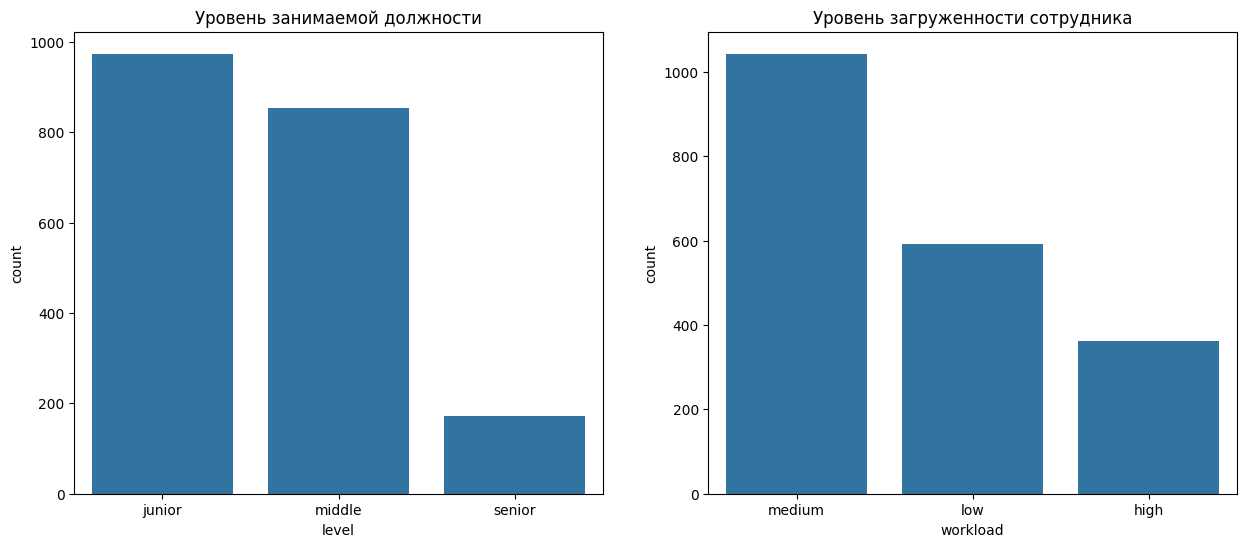

In [63]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=test_features2, x='level', ax=axes[0])
axes[0].set_title('Уровень занимаемой должности')

sns.countplot(data=test_features2, x='workload', ax=axes[1])
axes[1].set_title('Уровень загруженности сотрудника');

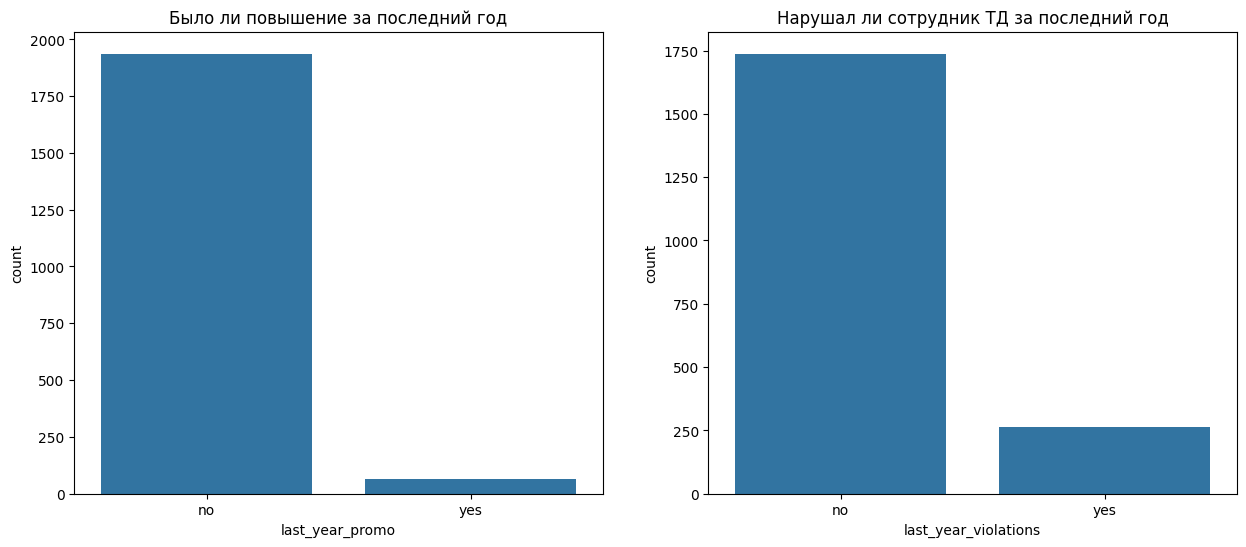

In [64]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=test_features2, x='last_year_promo', ax=axes[0])
axes[0].set_title('Было ли повышение за последний год')

sns.countplot(data=test_features2, x='last_year_violations', ax=axes[1])
axes[1].set_title('Нарушал ли сотрудник ТД за последний год');

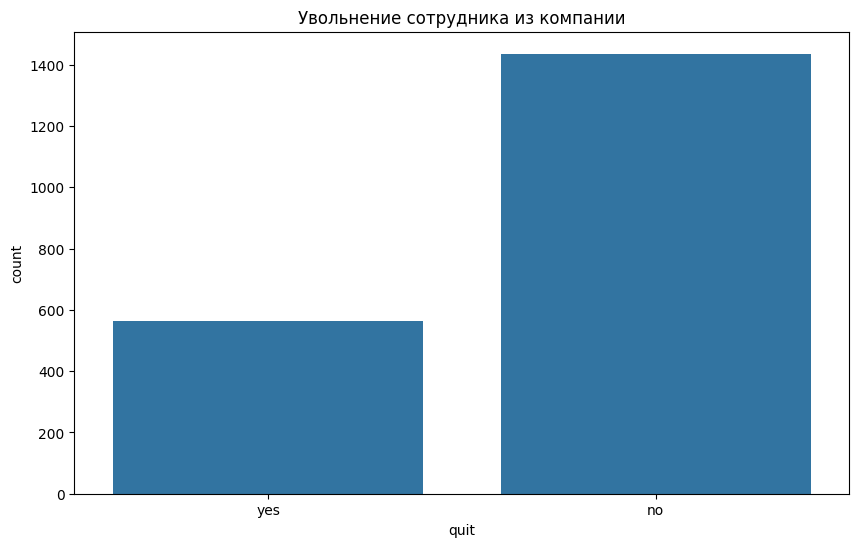

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(data=test_target_quit2, x='quit')
plt.title('Увольнение сотрудника из компании');

Составим портрет «уволившегося сотрудника»

In [66]:
df_quit = train_quit2[train_quit2['quit'] == 'yes']
df_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
257132,sales,junior,medium,2,no,yes,3,24000,yes
699916,sales,junior,low,1,no,yes,3,18000,yes
613206,technology,middle,medium,2,no,no,3,45600,yes
468145,technology,junior,medium,2,no,no,3,30000,yes
982346,marketing,junior,medium,3,no,no,3,30000,yes
...,...,...,...,...,...,...,...,...,...
150315,purchasing,junior,low,1,no,no,2,15600,yes
778735,technology,junior,low,2,no,no,4,22800,yes
775320,technology,junior,high,1,no,no,4,42000,yes


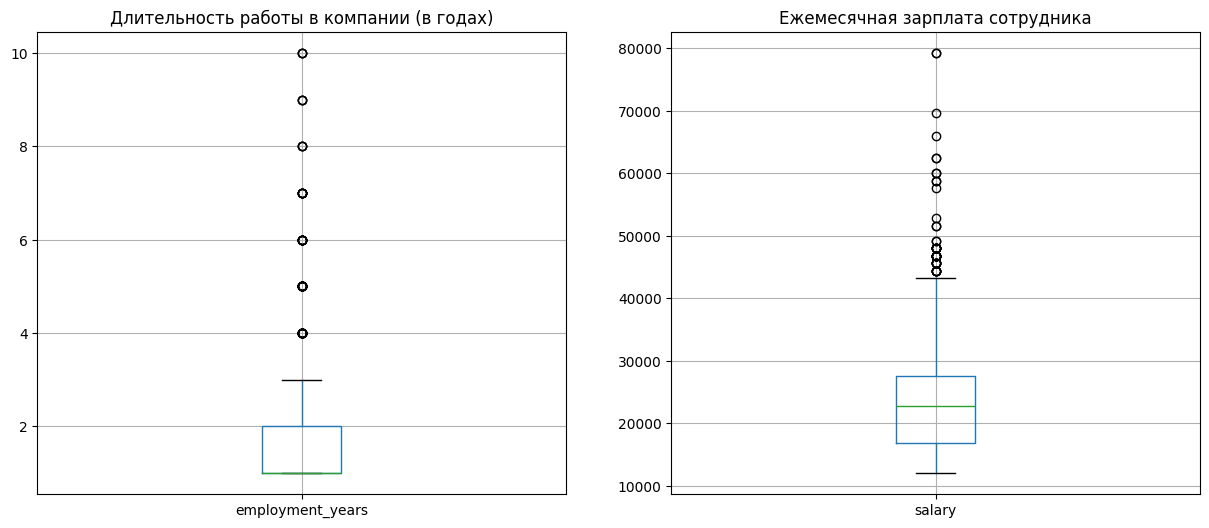

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

df_quit.boxplot(column = 'employment_years', ax=axes[0])
axes[0].set_title('Длительность работы в компании (в годах)')

df_quit.boxplot(column = 'salary', ax=axes[1])
axes[1].set_title('Ежемесячная зарплата сотрудника');

In [68]:
df_quit['employment_years'].value_counts(normalize=True).round(2)

employment_years
1     0.53
2     0.26
3     0.14
4     0.02
5     0.02
6     0.01
7     0.01
10    0.00
8     0.00
9     0.00
Name: proportion, dtype: float64

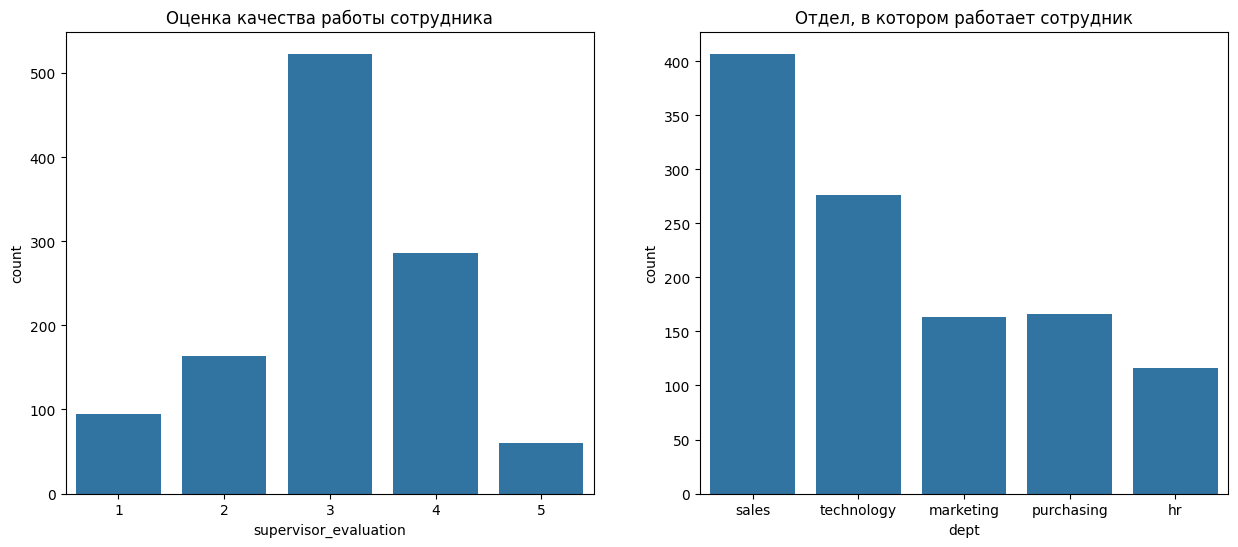

In [69]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=df_quit, x='supervisor_evaluation', ax=axes[0])
axes[0].set_title('Оценка качества работы сотрудника')

sns.countplot(data=df_quit, x='dept', ax=axes[1])
axes[1].set_title('Отдел, в котором работает сотрудник');

In [70]:
df_quit['supervisor_evaluation'].value_counts(normalize=True).round(2)

supervisor_evaluation
3    0.46
4    0.25
2    0.15
1    0.08
5    0.05
Name: proportion, dtype: float64

In [71]:
df_quit['dept'].value_counts(normalize=True).round(2)

dept
sales         0.36
technology    0.24
purchasing    0.15
marketing     0.14
hr            0.10
Name: proportion, dtype: float64

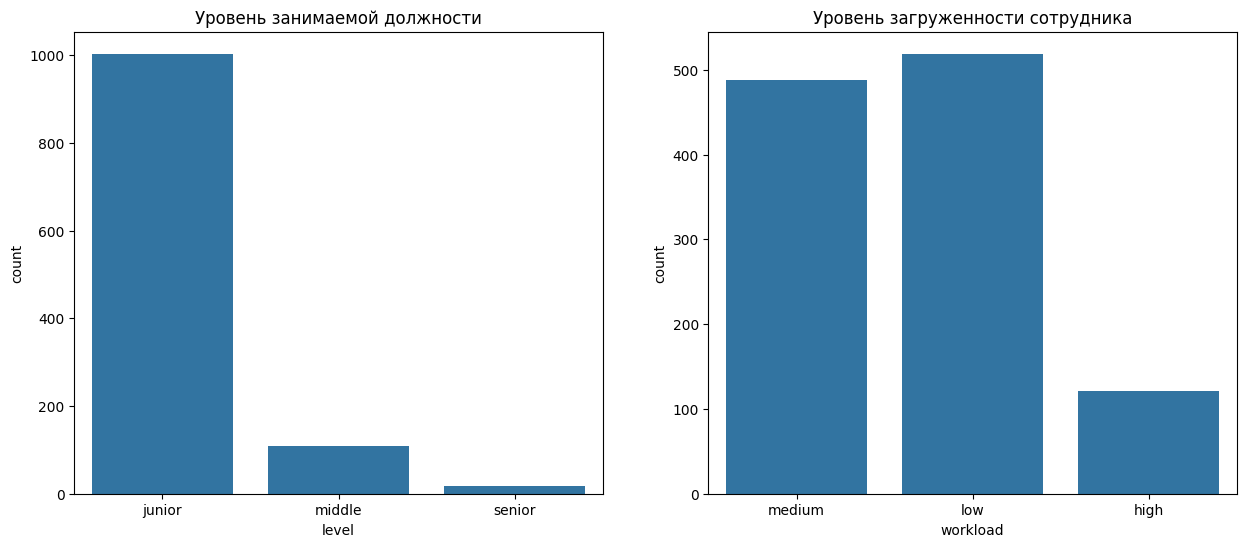

In [72]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=df_quit, x='level', ax=axes[0])
axes[0].set_title('Уровень занимаемой должности')

sns.countplot(data=df_quit, x='workload', ax=axes[1])
axes[1].set_title('Уровень загруженности сотрудника');

In [73]:
df_quit['level'].value_counts(normalize=True).round(2)

level
junior    0.89
middle    0.10
senior    0.02
Name: proportion, dtype: float64

In [74]:
df_quit['workload'].value_counts(normalize=True).round(2)

workload
low       0.46
medium    0.43
high      0.11
Name: proportion, dtype: float64

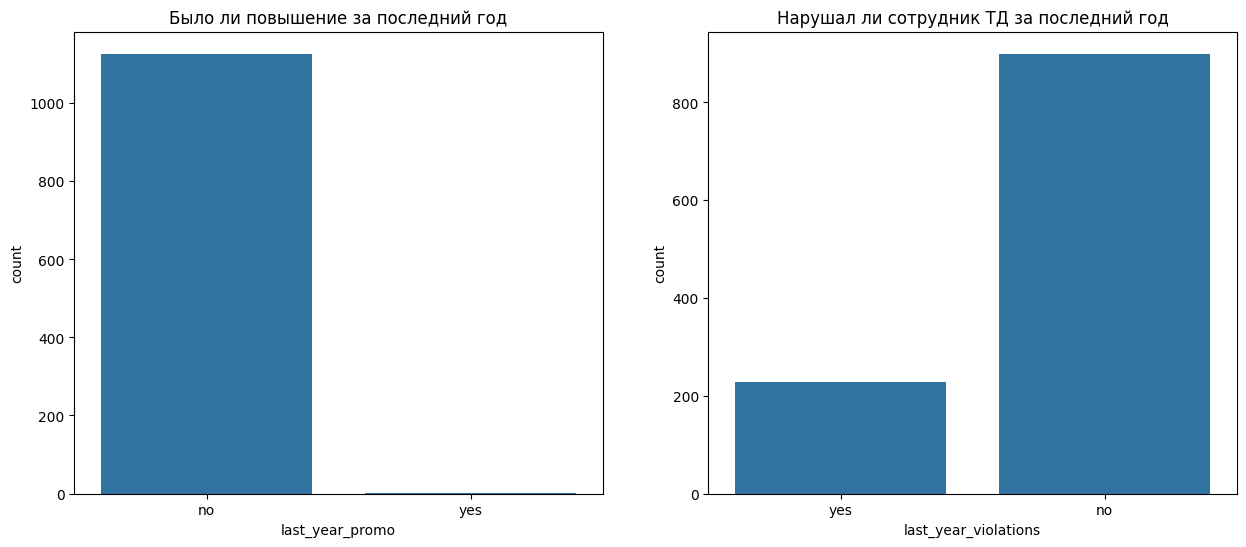

In [75]:
kat, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(data=df_quit, x='last_year_promo', ax=axes[0])
axes[0].set_title('Было ли повышение за последний год')

sns.countplot(data=df_quit, x='last_year_violations', ax=axes[1])
axes[1].set_title('Нарушал ли сотрудник ТД за последний год');

In [76]:
df_quit['last_year_promo'].value_counts(normalize=True).round(2)

last_year_promo
no     1.0
yes    0.0
Name: proportion, dtype: float64

In [77]:
df_quit['last_year_violations'].value_counts(normalize=True).round(2)

last_year_violations
no     0.8
yes    0.2
Name: proportion, dtype: float64

Можем определить основные параметры уволенного сотрудника. В основном это сотрудники, работающие 1-2 года в компании. Плохо выполняющие свои обязанности (по оценке руководства). Это junior, не получающие повышения в последний год

**Задание:**  
уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

Для решения нам нужны тестовые выборки из обеих задач. Сначала мы удалим дубликаты, объединим датасеты из каждой задачи по id. А далее присоединим их друг к другу

In [78]:
df_test_job = test_features.drop_duplicates()
df_test_job = df_test_job.merge(test_target, on ='id')
df_test_job.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [79]:
df_test_quit = test_features2.drop_duplicates()
df_test_quit = df_test_quit.merge(test_target_quit2, on ='id')
df_test_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no
418655,sales,middle,low,6,no,no,4,19200,no
789145,hr,middle,medium,5,no,no,5,40800,no


In [80]:
df_quit_rate = df_test_quit.merge(df_test_job['job_satisfaction_rate'], on='id')
df_quit_rate.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.79
686555,hr,junior,medium,1,no,no,4,30000,no,0.72
467458,sales,middle,low,5,no,no,4,19200,no,0.64
418655,sales,middle,low,6,no,no,4,19200,no,0.60
789145,hr,middle,medium,5,no,no,5,40800,no,0.75


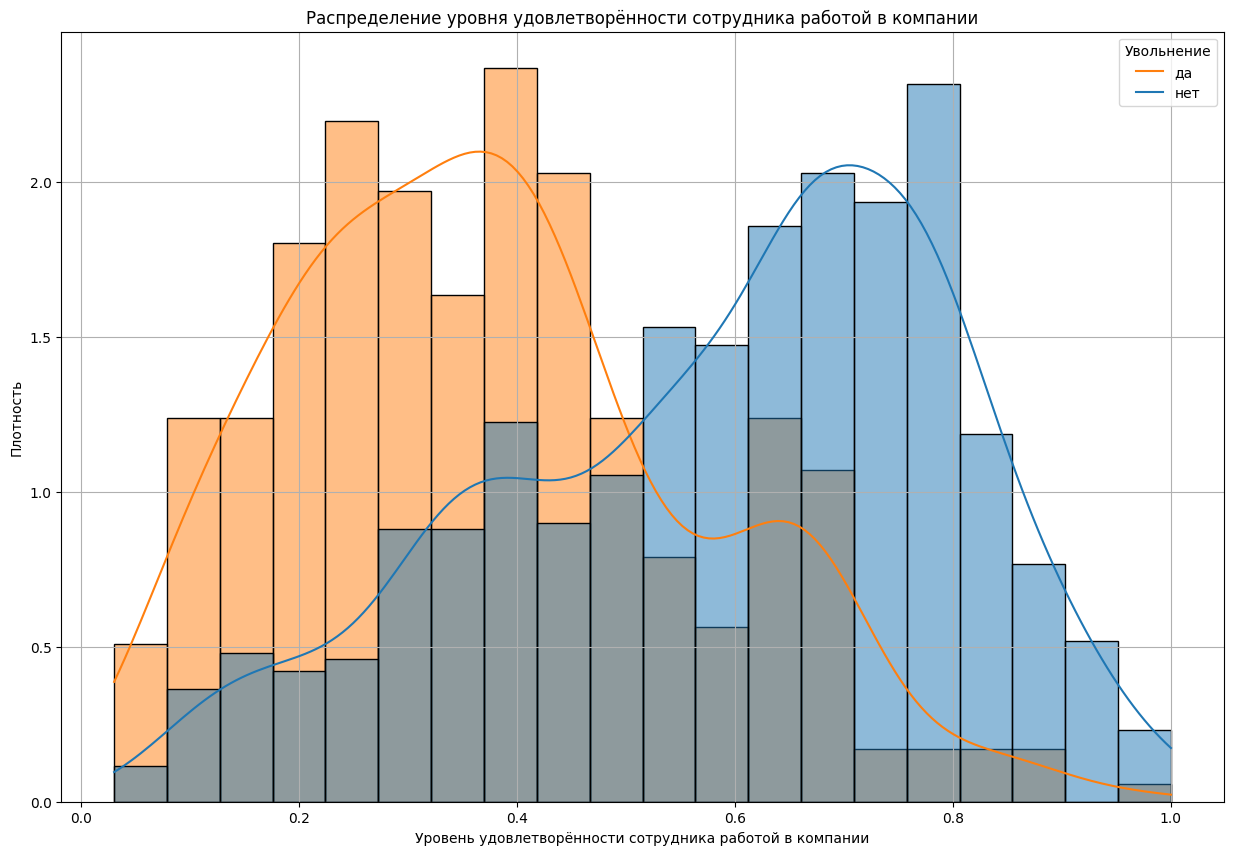

In [81]:
plt.figure(figsize=(15,10))
sns.histplot(data = df_quit_rate, x='job_satisfaction_rate', hue = 'quit', kde=True, bins=20, stat='density', common_norm=False)
plt.title('Распределение уровня удовлетворённости сотрудника работой в компании')
plt.legend(title = 'Увольнение', labels = ['да', 'нет'])
plt.xlabel('Уровень удовлетворённости сотрудника работой в компании')
plt.ylabel('Плотность')
plt.grid(True);

Видим, что в среднем уровень удовлетворённости сотрудника работой в компании гораздо ниже у тех, кто уволился чем у тех, кто остался. Проверим на t-test:
**Нулевая гипотеза:** удовлетворенность уволенных и не уволенных сотрудников равны  
**Альтернативная гипотеза:** удовлетворенность уволенных и не уволенных сотрудников отличается  

In [82]:
result = stats.ttest_ind(
    df_quit_rate[df_quit_rate['quit'] == 'yes']['job_satisfaction_rate'],
    df_quit_rate[df_quit_rate['quit'] == 'no']['job_satisfaction_rate'],
    equal_var=False
)

p_value = result.pvalue
print(p_value)

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

6.829345037760655e-62
Отвергаем нулевую гипотезу


У нас есть статистическая основания утверждать, что удовлетворенность уволенных и работающих в компании сотрудников различается

**ИТОГО ПО РАЗДЕЛУ:** 

Объединили три датасета в один, посмотреть на общие распределения, возможные выбросы в данных, какие-то закономерности
1) Были исследованы количественные и категориальные признаки  
2) Выбросы с ежемесячной зарплатой сотрудников связаны с тем, что это зарплаты сеньоров  
3) Почти все сотрудники не получали повышение в последний год, и многие не нарушали трудовой договор  
4) В остальном везде нормальное распределение, более-менее разумное количество в каждых оцениваемых группах, без сюрпризов  
5) Составили портрет уволенного сотрудника. В основном это сотрудники, работающие 1-2 года в компании. Плохо выполняющие свои обязанности (по оценке руководства). Это junior с низкой загруженностью, не получающие повышения в последний год  
6) Посмотрели на распределение уровня удовлетворённости сотрудника работой в компании для уволеннных и оставшихся сотрудиков Оно заметно ниже у тех, кто уволился
7) Провели t-test, и у нас есть статистическая основания утверждать, что удовлетворенность уволенных и работающих в компании сотрудников различается

<a id="признак2"></a>  
# 4. Добавление нового входного признака

Для того, чтобы добавить job_satisfaction_rate, предсказанный лучшей моделью первой задачи, выполним следующие действия:
1) Создадим датафрейм, где сопоставим значения id с предсказанными значениями

In [83]:
df1_y_test_pred = pd.DataFrame({
    'y_test': y_test,
    'job_satisfaction_rate': y_test_pred
})
df1_y_test_pred.head(3)

,y_test,job_satisfaction_rate
id,,
485046,0.79,0.863333
686555,0.72,0.670417
467458,0.64,0.654000


2) Возьмем из этой таблицы y_test_pred и подставим в тестовые признаки второй задачи

In [84]:
test_features2_job = test_features2.merge(df1_y_test_pred['job_satisfaction_rate'], on = 'id')
test_features2_job.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.863333
686555,hr,junior,medium,1,no,no,4,30000,0.670417
467458,sales,middle,low,5,no,no,4,19200,0.654000


3) Берем лучшую модель из первого задания и предсказываем на тренировочных данных второй задачи, добавляем новый столбец

In [85]:
y_test_pred1 = gs.predict(train_quit2)

train_quit2['job_satisfaction_rate'] = y_test_pred1
train_quit2.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.660000
814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.364091


In [86]:
interval_cols2 = list(train_quit2.select_dtypes(include='number').columns)
for col in ['employment_years', 'supervisor_evaluation']:
            interval_cols2.remove(col)
interval_cols2

['salary', 'job_satisfaction_rate']

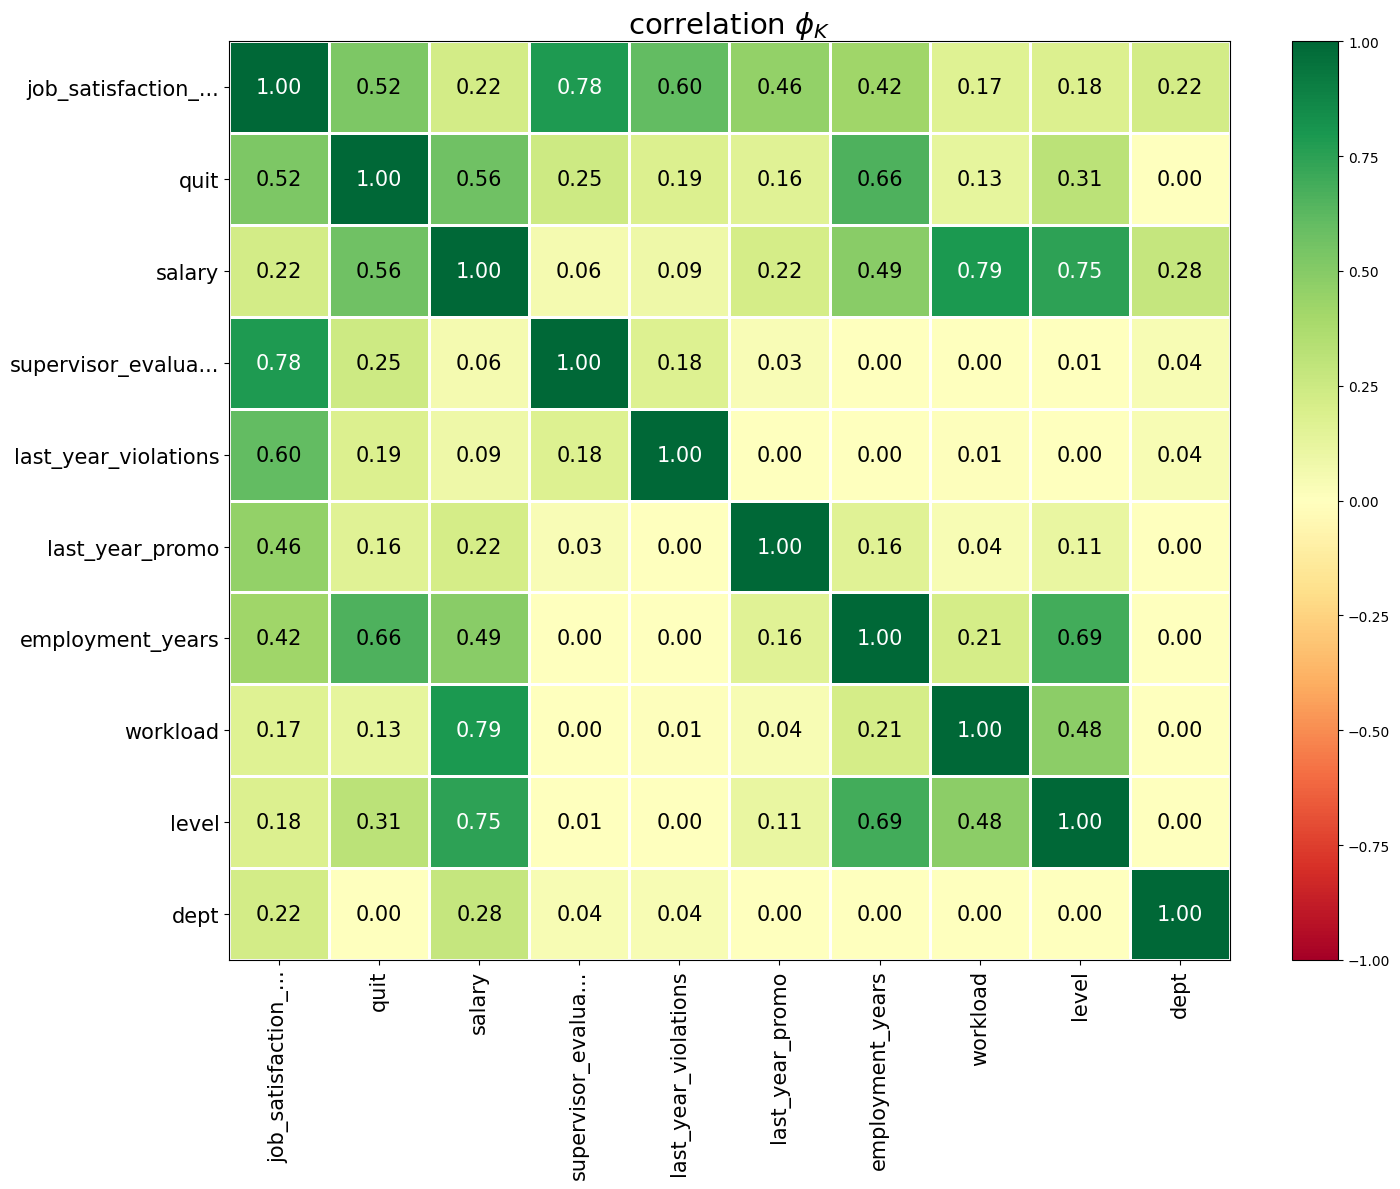

In [87]:
phik_overview = train_quit2.phik_matrix(interval_cols=interval_cols2)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

In [88]:
interval_cols3 = list(test_features2_job.select_dtypes(include='number').columns)
for col in ['employment_years', 'supervisor_evaluation']:
            interval_cols3.remove(col)
interval_cols3

['salary', 'job_satisfaction_rate']

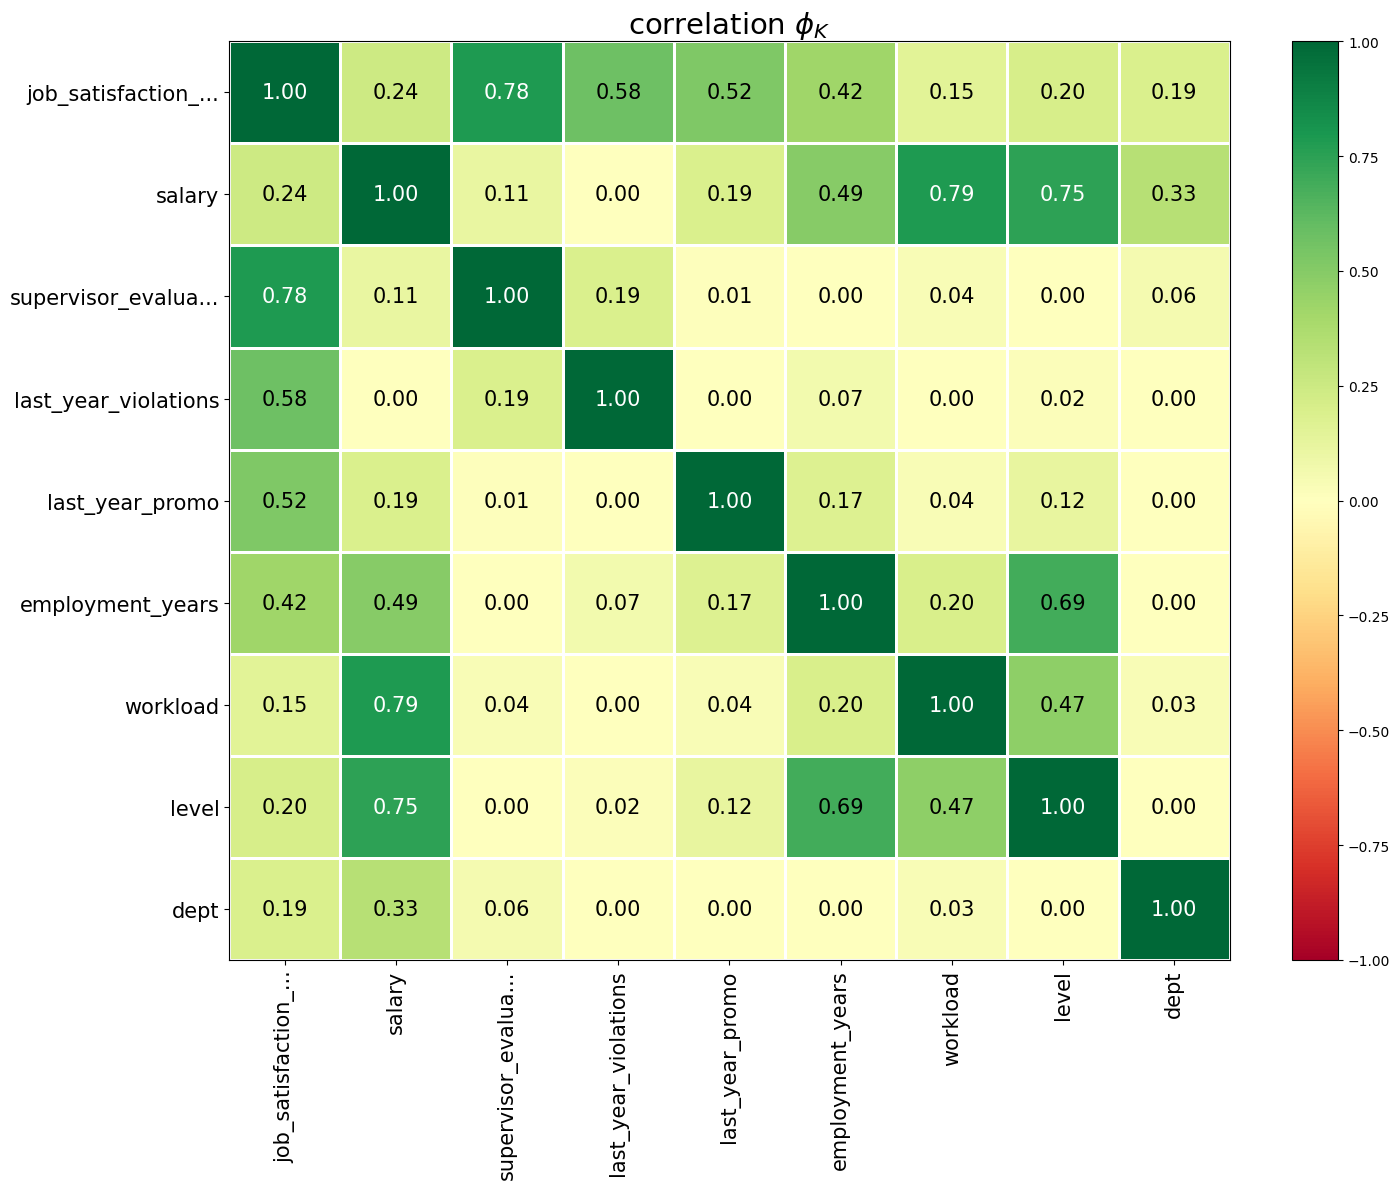

In [89]:
phik_overview = test_features2_job.phik_matrix(interval_cols=interval_cols3)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

**Итого по разделу:**
- Добавили job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи. В тренировочные данные мы добавили через обучение, в тестовые путём присоединения предсказаний из первого задания по id
- Мультиколлениарности нет, всё в порядке, теперь можно перейти к подготовке данных

<a id="подготовка2"></a>
# 5. Подготовка данных

Начинаем подготовку к моделированию. Удалим дубликаты из train_quit2

In [90]:
train_quit2.duplicated().sum()

1413

In [91]:
train_quit2 = train_quit2.drop_duplicates()
train_quit2.shape

(2587, 10)

In [92]:
display(train_quit2.head(3))
display(test_features2_job.head(3))
display(test_target_quit2.head(3))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.660000
814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.364091


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.863333
686555,hr,junior,medium,1,no,no,4,30000,0.670417
467458,sales,middle,low,5,no,no,4,19200,0.654000


,quit
id,
999029,yes
372846,no
726767,no


Объединим тестовые датасеты в один

In [93]:
test_job2 = test_features2_job.merge(test_target_quit2, on = 'id')
test_job2.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.863333,no
686555,hr,junior,medium,1,no,no,4,30000,0.670417,no
467458,sales,middle,low,5,no,no,4,19200,0.654000,no


In [94]:
X_train2 = train_quit2.drop(columns = 'quit')
y_train2 = train_quit2['quit']

X_test2 = test_job2.drop(columns = 'quit')
y_test2 = test_job2['quit']


ohe_columns2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns2 = ['level', 'workload']
num_columns2 = ['employment_years', 'salary', 'job_satisfaction_rate', 'supervisor_evaluation']

In [95]:
ohe_pipe2 = Pipeline([
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])

ord_pipe2 = Pipeline([
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[
                                            ['junior', 'middle', 'senior'],
                                            ['low', 'medium', 'high']
                                          ], handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'))    
    ])

data_preprocessor2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe2, ohe_columns2),
        ('ord', ord_pipe2, ord_columns2),
        ('num', MinMaxScaler(), num_columns2)
    ], 
    remainder='passthrough') 

pipe_final2= Pipeline([
        ('preprocessor', data_preprocessor2),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

param_grid2 = [
     {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
         'models__max_depth': range(1, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='saga',
            max_iter=2000
        )],
        'models__C': range(5, 10),
        'models__l1_ratio': [1.0],   # чистый L1
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__C': range(1, 5),
        'models__kernel': ['rbf'],
         'models__gamma': ['auto'],                
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] 
    }
]

**Итог по разделу:**
1) Проверили данные на мультиколлинеарность - всё в порядке, её нет  
2) Были объединены два датасета с тестовыми данными по id, чтобы потом правильно разделить тренировочную и тестовую по входным и целевым признакам  
2) Создали пайплайн с 3 моделями, разделили признаки по категориям, преобразовали их

<a id="модели2"></a>  
# 6. Обучение модели

In [96]:
gs2 = GridSearchCV(
    pipe_final2,
    param_grid2,
    cv=5,
    scoring='roc_auc'
)

gs2.fit(X_train2, y_train2)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'models': [DecisionTreeC...ndom_state=42)], 'models__max_depth': range(1, 3), 'preprocessor__num': [StandardScaler(), MinMaxScaler(), ...]}, {'models': [LogisticRegre...solver='saga')], 'models__C': range(5, 10), 'models__l1_ratio': [1.0], 'preprocessor__num': [StandardScaler(), MinMaxScaler()]}, ...]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv``

In [97]:
print('Лучшая модель и её параметры:\n\n', gs2.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', gs2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [98]:
pd.DataFrame(gs2.cv_results_)[['rank_test_score', 'mean_test_score','params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
21,1,0.907634,"{'models': SVC(probability=True, random_state=42), 'models__C': 3, 'models__gamma': 'auto', 'mod..."
23,2,0.907477,"{'models': SVC(probability=True, random_state=42), 'models__C': 4, 'models__gamma': 'auto', 'mod..."
19,3,0.907235,"{'models': SVC(probability=True, random_state=42), 'models__C': 2, 'models__gamma': 'auto', 'mod..."
17,4,0.906476,"{'models': SVC(probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'auto', 'mod..."
12,5,0.903457,"{'models': LogisticRegression(max_iter=2000, random_state=42, solver='saga'), 'models__C': 8, 'm..."
14,6,0.903453,"{'models': LogisticRegression(max_iter=2000, random_state=42, solver='saga'), 'models__C': 9, 'm..."
10,7,0.903453,"{'models': LogisticRegression(max_iter=2000, random_state=42, solver='saga'), 'models__C': 7, 'm..."
8,8,0.903438,"{'models': LogisticRegression(max_iter=2000, random_state=42, solver='saga'), 'models__C': 6, 'm..."
6,9,0.903422,"{'models': LogisticRegression(max_iter=2000, random_state=42, solver='saga'), 'models__C': 5, 'm..."
13,10,0.903394,"{'models': LogisticRegression(max_iter=2000, random_state=42, solver='saga'), 'models__C': 8, 'm..."


In [99]:
y_test_pred_2 = gs2.predict_proba(X_test2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_test_pred_2)}')

Метрика ROC-AUC на тестовой выборке: 0.9196268940516406


**Итого по разделу:**
- было запущено обучение, в результате которого нашли лучшую модель SVC(probability=True), 'models__C': 3, 'models__gamma': 'auto', 'models__kernel': 'rbf',  метод масштабирования: StandardScaler

<a id="выводы2"></a>  
# 7. Выводы

Нам были даны три датасета. Датасет с тренировочными данными (входные + целевые признаки). И 2 датасета с тестовыми данными - в одном целевые, в другом входные признаки. Была преводена предобработка данных. В результате исследовательного анализа составили портрет уволенного сотрудника. Проверили данные на мультиколлинеарность. Создан пайплайн с 3 моделями, различными гиперпараметрами и разными методами масштабирования. И была найдена лучшая модель, которая должна была быть проанализирована по метрика ROC-AUC, и должна была быть больше 0.91. У нас же получилась метрика на тестовой выборке 0.922. Модель SVC(probability=True) models__C': 3, models__gamma': 'auto', 'models__kernel': 'rbf', метод масштабирования: StandardScaler

<a id="выводы3"></a>  
# Общий вывод

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. По его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.  

1) В первой задаче нам необходимо было предсказать уровень удовлетворённости сотрудника. Задача линейных моделей, предсказания будут в числовом формате. 3 датасета. Первый с тренировочными данными с входными и целевыми признаками. И 2 тестовых датасета, в одном целевые признаки, в другом входные. Была произведена предобработка данных, правильно снова разделены тестовые данные. Удалены дубликаты, избавились от неявных дубликатов. В результате исследовательского анализа проверили данные на наличие выбросов или каких-то необычных явлений. Но там всё в порядке, ничего удивительно найти не удалось. Данные проверили на мультиколлинеарность, и создали пайплайн с 2 моделями с различными гиперпараметрами. Нашли лучшую модель для предсказаний - DecisionTreeRegressor(max_depth=13), метрика SMAPE получилась меньше 15, а чем ближе к 0, тем лучше. Это очень хороший показатель
    
2) Во второй задаче схожие данные, только сейчас нам нужно построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. Бинарная классификация для решений, да или нет. Перед поиском модели мы составили портрет уволенного сотрудника.  В основном это сотрудники, работающие 1-2 года в компании. Плохо выполняющие свои обязанности (по оценке руководства). Это junior с низкой загруженностью, не получающие повышения в последний год. Так же визуализировали, что в среднем уровень удовлетворённости сотрудника работой в компании гораздо ниже у тех, кто уволился чем у тех, кто остался. Далее для анализа нужны данные из первой задачи, а именно job_satisfaction_rate (уровень удовлетворённости сотрудника работой в компании). Мы их предсказали и добавили во входные признаки. И создали пайплайн, с 3 моделями, где нашли лучшую модель по метрике ROC-AUC, она по условиям должна была быть более 0.91. У нас же получилось 0.92. И лучшей моделью получилась SVC(probability=True), коэффициент регуляризации: 3, 'models__gamma': 'auto', тип ядра : 'rbf', метод масштабирования: StandardScaler

По итогам работы можно сказать: чтобы минимизировать количество увольнений, нужно чаще мотивировать сотрудников (повышать их по должности или повышать зарплату), загружать их работой и помогать им, чтобы при этом качество их работы не падало